#  CHOOSING FEATURES AND NORMALIZATION

Before we apply any clustering algorithm we need to choose the features that we think fit the best
considerando le colonne vogliamo  prendere in considerazione una combinazione delle seguenti colonne:

- male_participation_rate: The rate of male participation might indicate certain patterns or trends.
- female_participation_rate: Similar to the male participation rate, you might want to include the female participation rate.
- killed_participation_rate: The rate of fatalities could be an important factor in understanding the severity of incidents.
- injured_participation_rate: Similar to fatalities, the rate of injuries could be crucial.
- arrested_participation_rate: The rate of arrests might indicate law enforcement activity and could be an interesting feature.
adult_participation_rate, teen_participation_rate, child_participation_rate: Breakdowns by age groups might reveal different patterns.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install geopandas
!pip install scipy


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import geopandas as gpd


In [ ]:
dfinal = pd.read_csv('/content/drive/MyDrive/DM-PRJ/feature_dataset++V2.csv')

In [ ]:
dfinal.info()

A good practice in clustering to avoid the bias given by the range of the different attribute is normalization.
The most common adopted normalizations are: Z-Score and Min-Max. we are gonna use MinMax

In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
dfinal.head(10)


index           state city_or_county  congressional_district  year  month  \
0   11499      CALIFORNIA      Hawthorne                      43  2013      1   
1   27292        COLORADO         Aurora                       6  2013      1   
2   92001       LOUISIANA      Charenton                       3  2013      1   
3   91993       LOUISIANA    New Orleans                       2  2013      1   
4  100495        MARYLAND      Baltimore                       7  2013      1   
5  122524        MISSOURI    Saint Louis                       1  2013      1   
6  138759      NEW MEXICO    Albuquerque                       1  2013      1   
7  149742  NORTH CAROLINA     Greensboro                       6  2013      1   
8  158579            OHIO         Lorain                       9  2013      1   
9  158582            OHIO    Springfield                       8  2013      1   

   male_participation_rate  female_participation_rate  \
0                      1.0                   0.229755   
1                      1.0                   1.000000   
2                      1.0                   0.229755   
3                      1.0                   0.229755   
4                      1.0                   0.229755   
5                      1.0                   0.229755   
6                      1.0                   1.000000   
7                      1.0                   1.000000   
8                      1.0                   0.229755   
9                      1.0                   0.229755   

   killed_participation_rate  injuredd_participation_rate  \
0                   1.000000                     1.000000   
1                   1.000000                     0.283672   
2                   1.000000                     1.000000   
3                   0.262363                     1.000000   
4                   1.000000                     1.000000   
5                   1.000000                     1.000000   
6                   1.000000                     0.283672   
7                   1.000000                     1.000000   
8                   1.000000                     1.000000   
9                   1.000000                     1.000000   

   killed/participants_rate  unharmed_rate  adult_participation_rate  \
0                  0.200000            1.0                       1.0   
1                  1.000000            1.0                       1.0   
2                  0.400000            1.0                       1.0   
3                  0.000000            1.0                       1.0   
4                  0.142857            1.0                       1.0   
5                  0.200000            1.0                       1.0   
6                  0.833333            1.0                       1.0   
7                  0.500000            1.0                       1.0   
8                  0.200000            1.0                       1.0   
9                  0.200000            1.0                       1.0   

   teen_participation_rate  child_participation_rate  \
0                 0.160397                  0.125048   
1                 0.160397                  0.125048   
2                 0.160397                  0.125048   
3                 0.160397                  0.125048   
4                 1.000000                  0.125048   
5                 0.160397                  0.125048   
6                 1.000000                  1.000000   
7                 1.000000                  0.125048   
8                 0.160397                  0.125048   
9                 0.160397                  0.125048   

   arrested_participation_rate  arrested/participants_rate       party  \
0                     0.324093                    0.000000    DEMOCRAT   
1                     0.324093                    0.000000  REPUBLICAN   
2                     1.000000                    0.200000  REPUBLICAN   
3                     0.324093                    0.000000    DEMOCRAT   
4                     0.324093  

In [ ]:
#Data normalization
#only on significative features
#only on numerical fields
dfinal_int = dfinal.select_dtypes(["int64","float64"])

#build the df with only the features
df_cluster = dfinal_int[['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate','povertyPercentage']]


normalize such features with their z-score by using the scikit-learn StandardScaler. Lets try with Min Max, a good analisys can be even to see the differences between datas in Zscore and Min Max

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# select the columns
columns_to_normalize = ['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate','povertyPercentage']

# build the df
df_cluster = dfinal_int[columns_to_normalize]

# MinMax Scaler
scaler = MinMaxScaler()

# Create a new df normalized
df_cluster_normalized = pd.DataFrame(scaler.fit_transform(df_cluster), columns=columns_to_normalize)


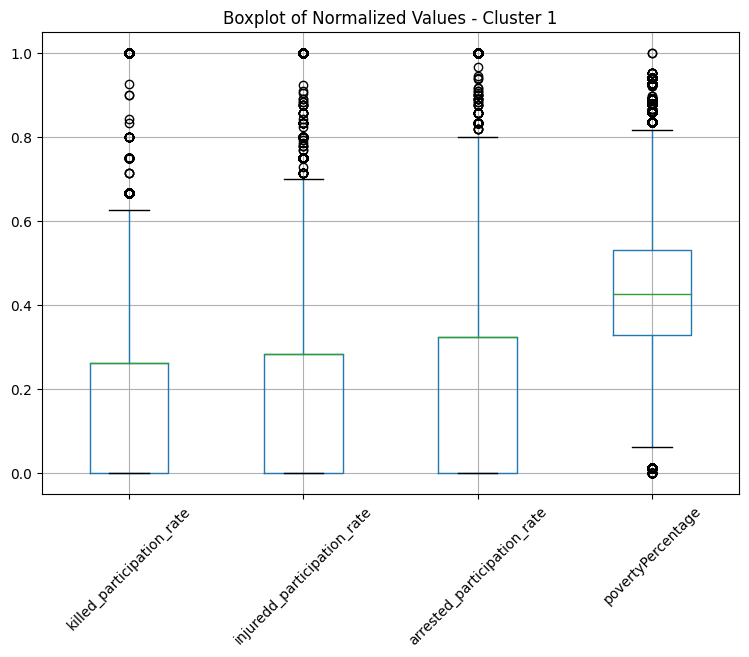

In [ ]:
#Let's plot the dataframes.
import matplotlib.pyplot as plt

# Plot  boxplot
plt.figure(figsize=(9, 6))
df_cluster_normalized.boxplot(rot=45)
plt.title('Boxplot of Normalized Values - Cluster 1')
plt.show()



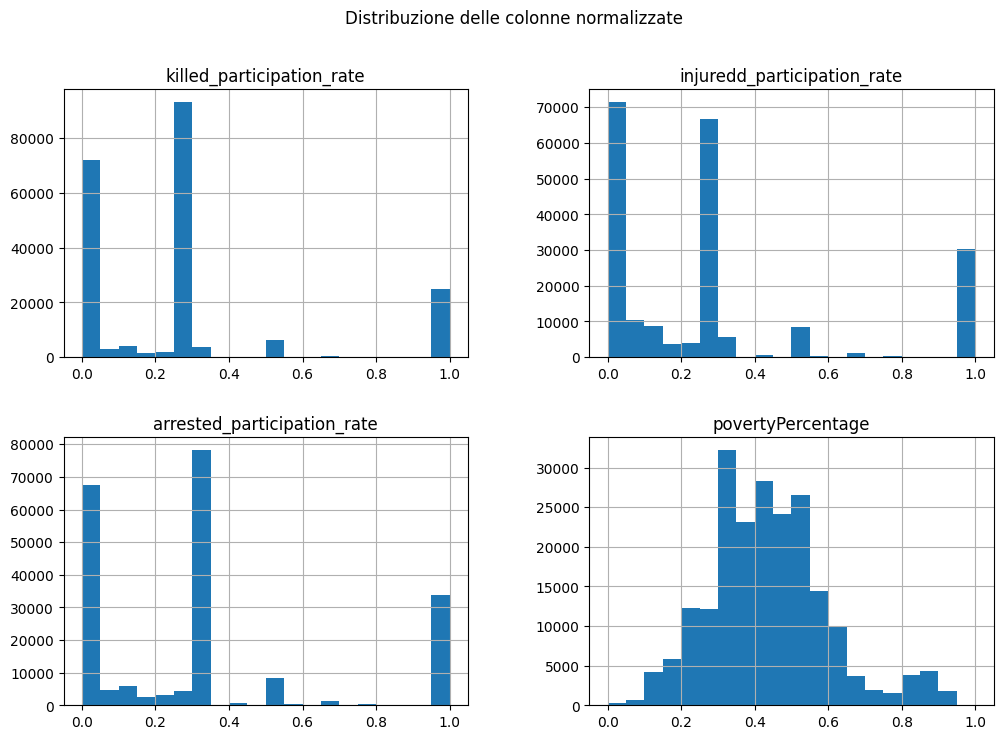

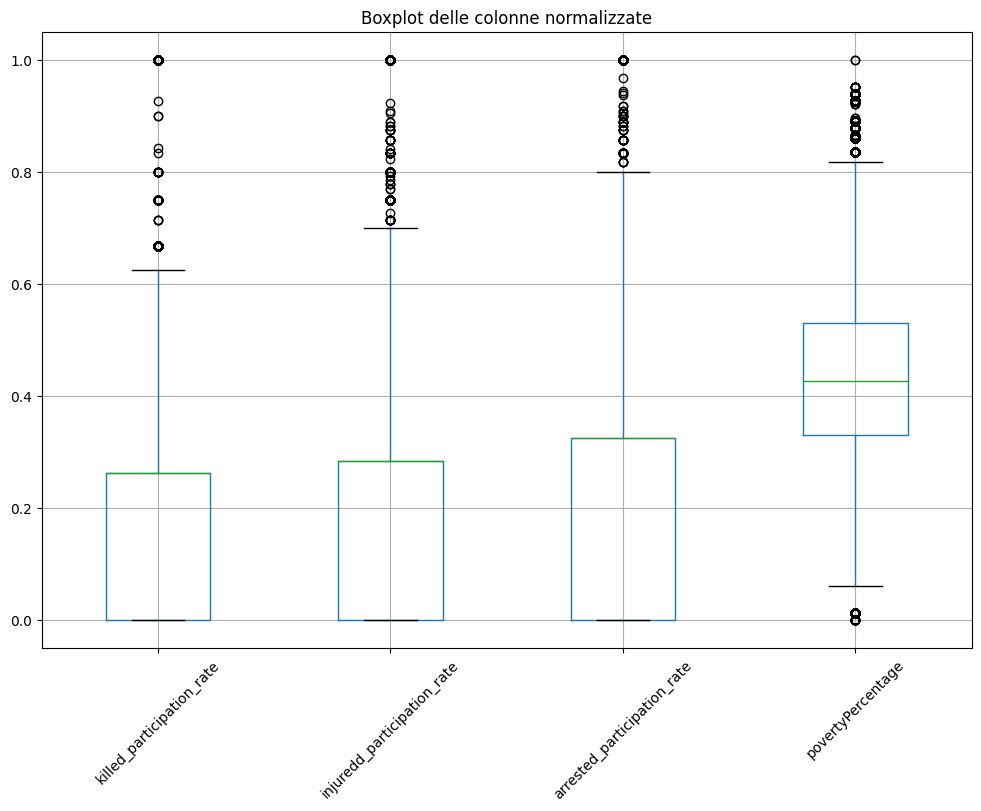

In [ ]:
import matplotlib.pyplot as plt

# Plot colums
df_cluster_normalized.hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribuzione delle colonne normalizzate')
plt.show()

# Boxplot colums
df_cluster_normalized.boxplot(figsize=(12, 8), rot=45)
plt.title('Boxplot delle colonne normalizzate')
plt.show()


#KMEANS

1.	SSE is a fundamental metric in clustering analysis, representing the sum of the squared distances between each data point and the center of its assigned cluster. A lower SSE indicates tighter and more compact clusters
2.	Silhouette Score quantifies how similar each data point within a cluster is to the other points in the same cluster compared to those in neighboring clusters. The more cohesion is given by a range from -1 +1
3.	Davies-Bouldin Score evaluates both the cohesion within clusters and the separation between clusters. A lower score indicates more coherent and distinct clusters.


In [ ]:
pip install yellowbrick scikit-learn


#Identify the best K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

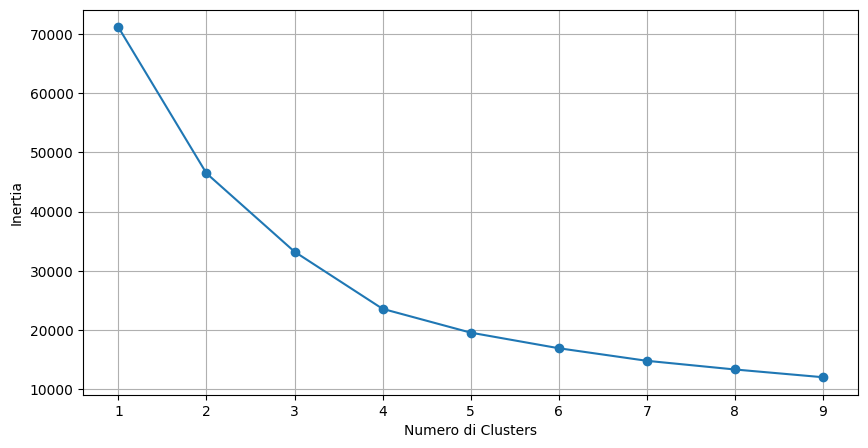

In [ ]:
from sklearn.cluster import KMeans

def ottimizza_kmeans(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    #l'elbow plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(means, inertias, 'o-')
    ax.set_xlabel('Numero di Clusters')
    ax.set_ylabel('Inertia')
    ax.grid(True)
    plt.show()

#df_cluster_normalized
ottimizza_kmeans(df_cluster_normalized[['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']], 10)


Even with the elbow plot we can see as result the Number ok K = 4

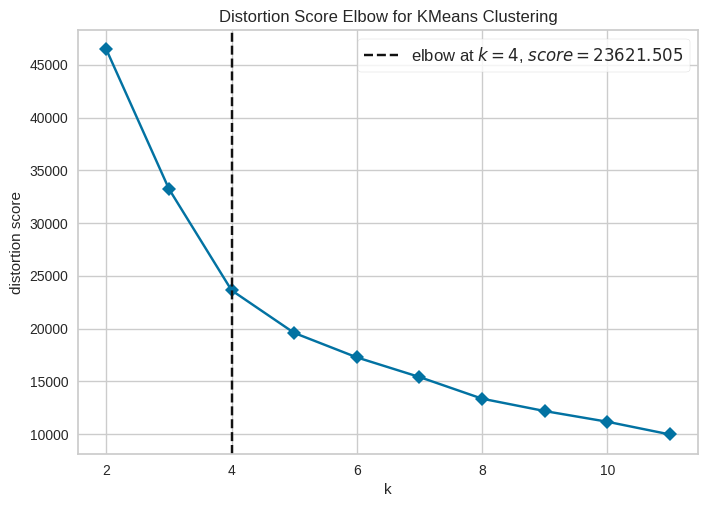

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


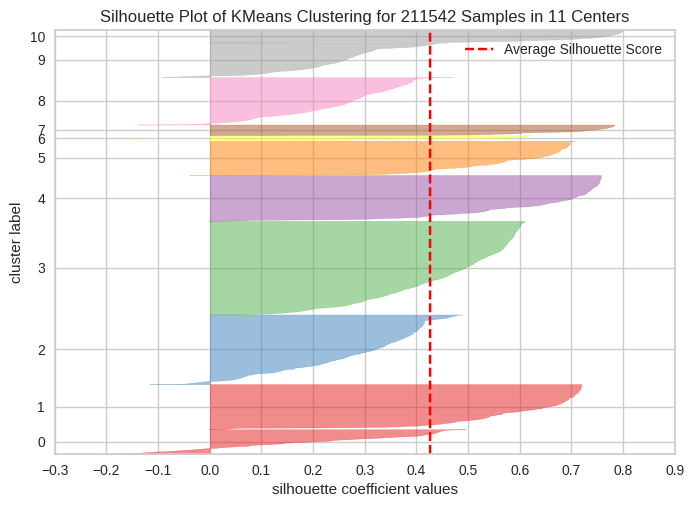

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 211542 Samples in 11 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#  KMeans
model = KMeans(n_init=10, max_iter=100, init="k-means++")

#  (Elbow)  SSE
sse_visualizer = KElbowVisualizer(model, k=(2, 12), timings=False)
sse_visualizer.fit(df_cluster_normalized)
sse_visualizer.show()

#  silhouette
sil_visualizer = SilhouetteVisualizer(model, k=(2, 8), timings=False)
sil_visualizer.fit(df_cluster_normalized)
sil_visualizer.show()


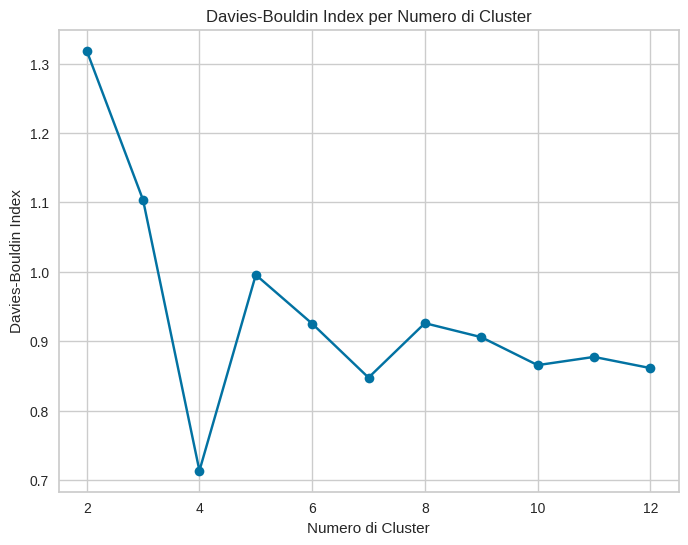

In [ ]:
from sklearn.metrics import davies_bouldin_score

#  KMeans
model = KMeans(n_init=10, max_iter=100, init="k-means++")

k_values = range(2, 13)

#save Davies-Bouldin
davies_bouldin_scores = []

# different clusters
for k in k_values:
    model.set_params(n_clusters=k)
    model.fit(df_cluster_normalized)

    #  Davies-Bouldin
    db_score = davies_bouldin_score(df_cluster_normalized, model.labels_)

    # save the score
    davies_bouldin_scores.append(db_score)

# Plot score
plt.figure(figsize=(8, 6))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index per Numero di Cluster')
plt.xlabel('Numero di Cluster')
plt.ylabel('Davies-Bouldin Index')
plt.show()



#both results gave 4 as best numbers  ​​of clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler


optimal_k = 4

# KMeans optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, n_init=10, max_iter=100, init="k-means++")
kmeans.fit(df_cluster_normalized)

#
sse = kmeans.inertia_
db_score = davies_bouldin_score(df_cluster_normalized, kmeans.labels_)
silhouette = silhouette_score(df_cluster_normalized, kmeans.labels_)

# metrics
print(f"SSE: {sse}")
print(f"Davies-Bouldin Score: {db_score}")
print(f"Silhouette Score: {silhouette}")


SSE: 23621.50545232647
Davies-Bouldin Score: 0.6965759176298202
Silhouette Score: 0.5054826628855101


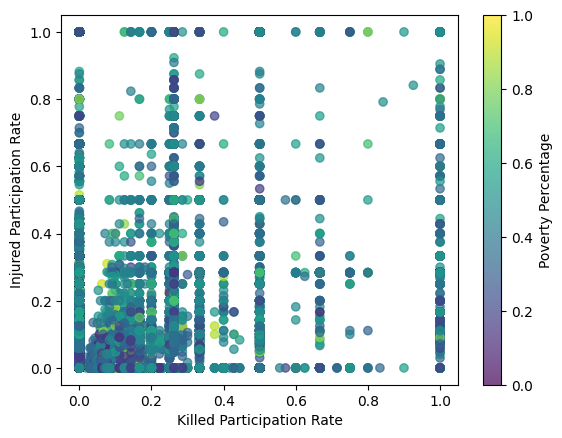

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_cluster_normalized['killed_participation_rate'],
            df_cluster_normalized['injuredd_participation_rate'],
            c=df_cluster_normalized['povertyPercentage'],
            cmap='viridis',
            alpha=0.7)

plt.xlabel('Killed Participation Rate')
plt.ylabel('Injured Participation Rate')
plt.colorbar(label='Poverty Percentage')

plt.show()



k = 4
even by increasing the range such as from 2.8 to 2.12 the clusters remain 4

# kmeans



In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

#

kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_cluster_normalized[['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
df_cluster_normalized['kmeans_4'] = kmeans.labels_

In [ ]:
df_cluster_normalized.head(15)

killed_participation_rate  injuredd_participation_rate  \
0                    1.000000                     1.000000   
1                    1.000000                     0.283672   
2                    1.000000                     1.000000   
3                    0.262363                     1.000000   
4                    1.000000                     1.000000   
5                    1.000000                     1.000000   
6                    1.000000                     0.283672   
7                    1.000000                     1.000000   
8                    1.000000                     1.000000   
9                    1.000000                     1.000000   
10                   1.000000                     0.283672   
11                   0.262363                     1.000000   
12                   1.000000                     1.000000   
13                   0.262363                     1.000000   
14                   1.000000                     1.000000   

    arrested_participation_rate  povertyPercentage  kmeans_4  
0                      0.324093           0.579268         3  
1                      0.324093           0.341463         3  
2                      1.000000           0.951220         3  
3                      0.324093           0.951220         0  
4                      0.324093           0.280488         3  
5                      0.324093           0.439024         3  
6                      1.000000           1.000000         3  
7                      0.324093           0.628049         3  
8                      1.000000           0.567073         3  
9                      1.000000           0.567073         3  
10                     1.000000           0.737805         3  
11                     1.000000           0.402439         0  
12                     0.324093           0.634146         3  
13                     0.324093           0.579268         0  
14                     0.324093           0.579268         3

#Plot dei results

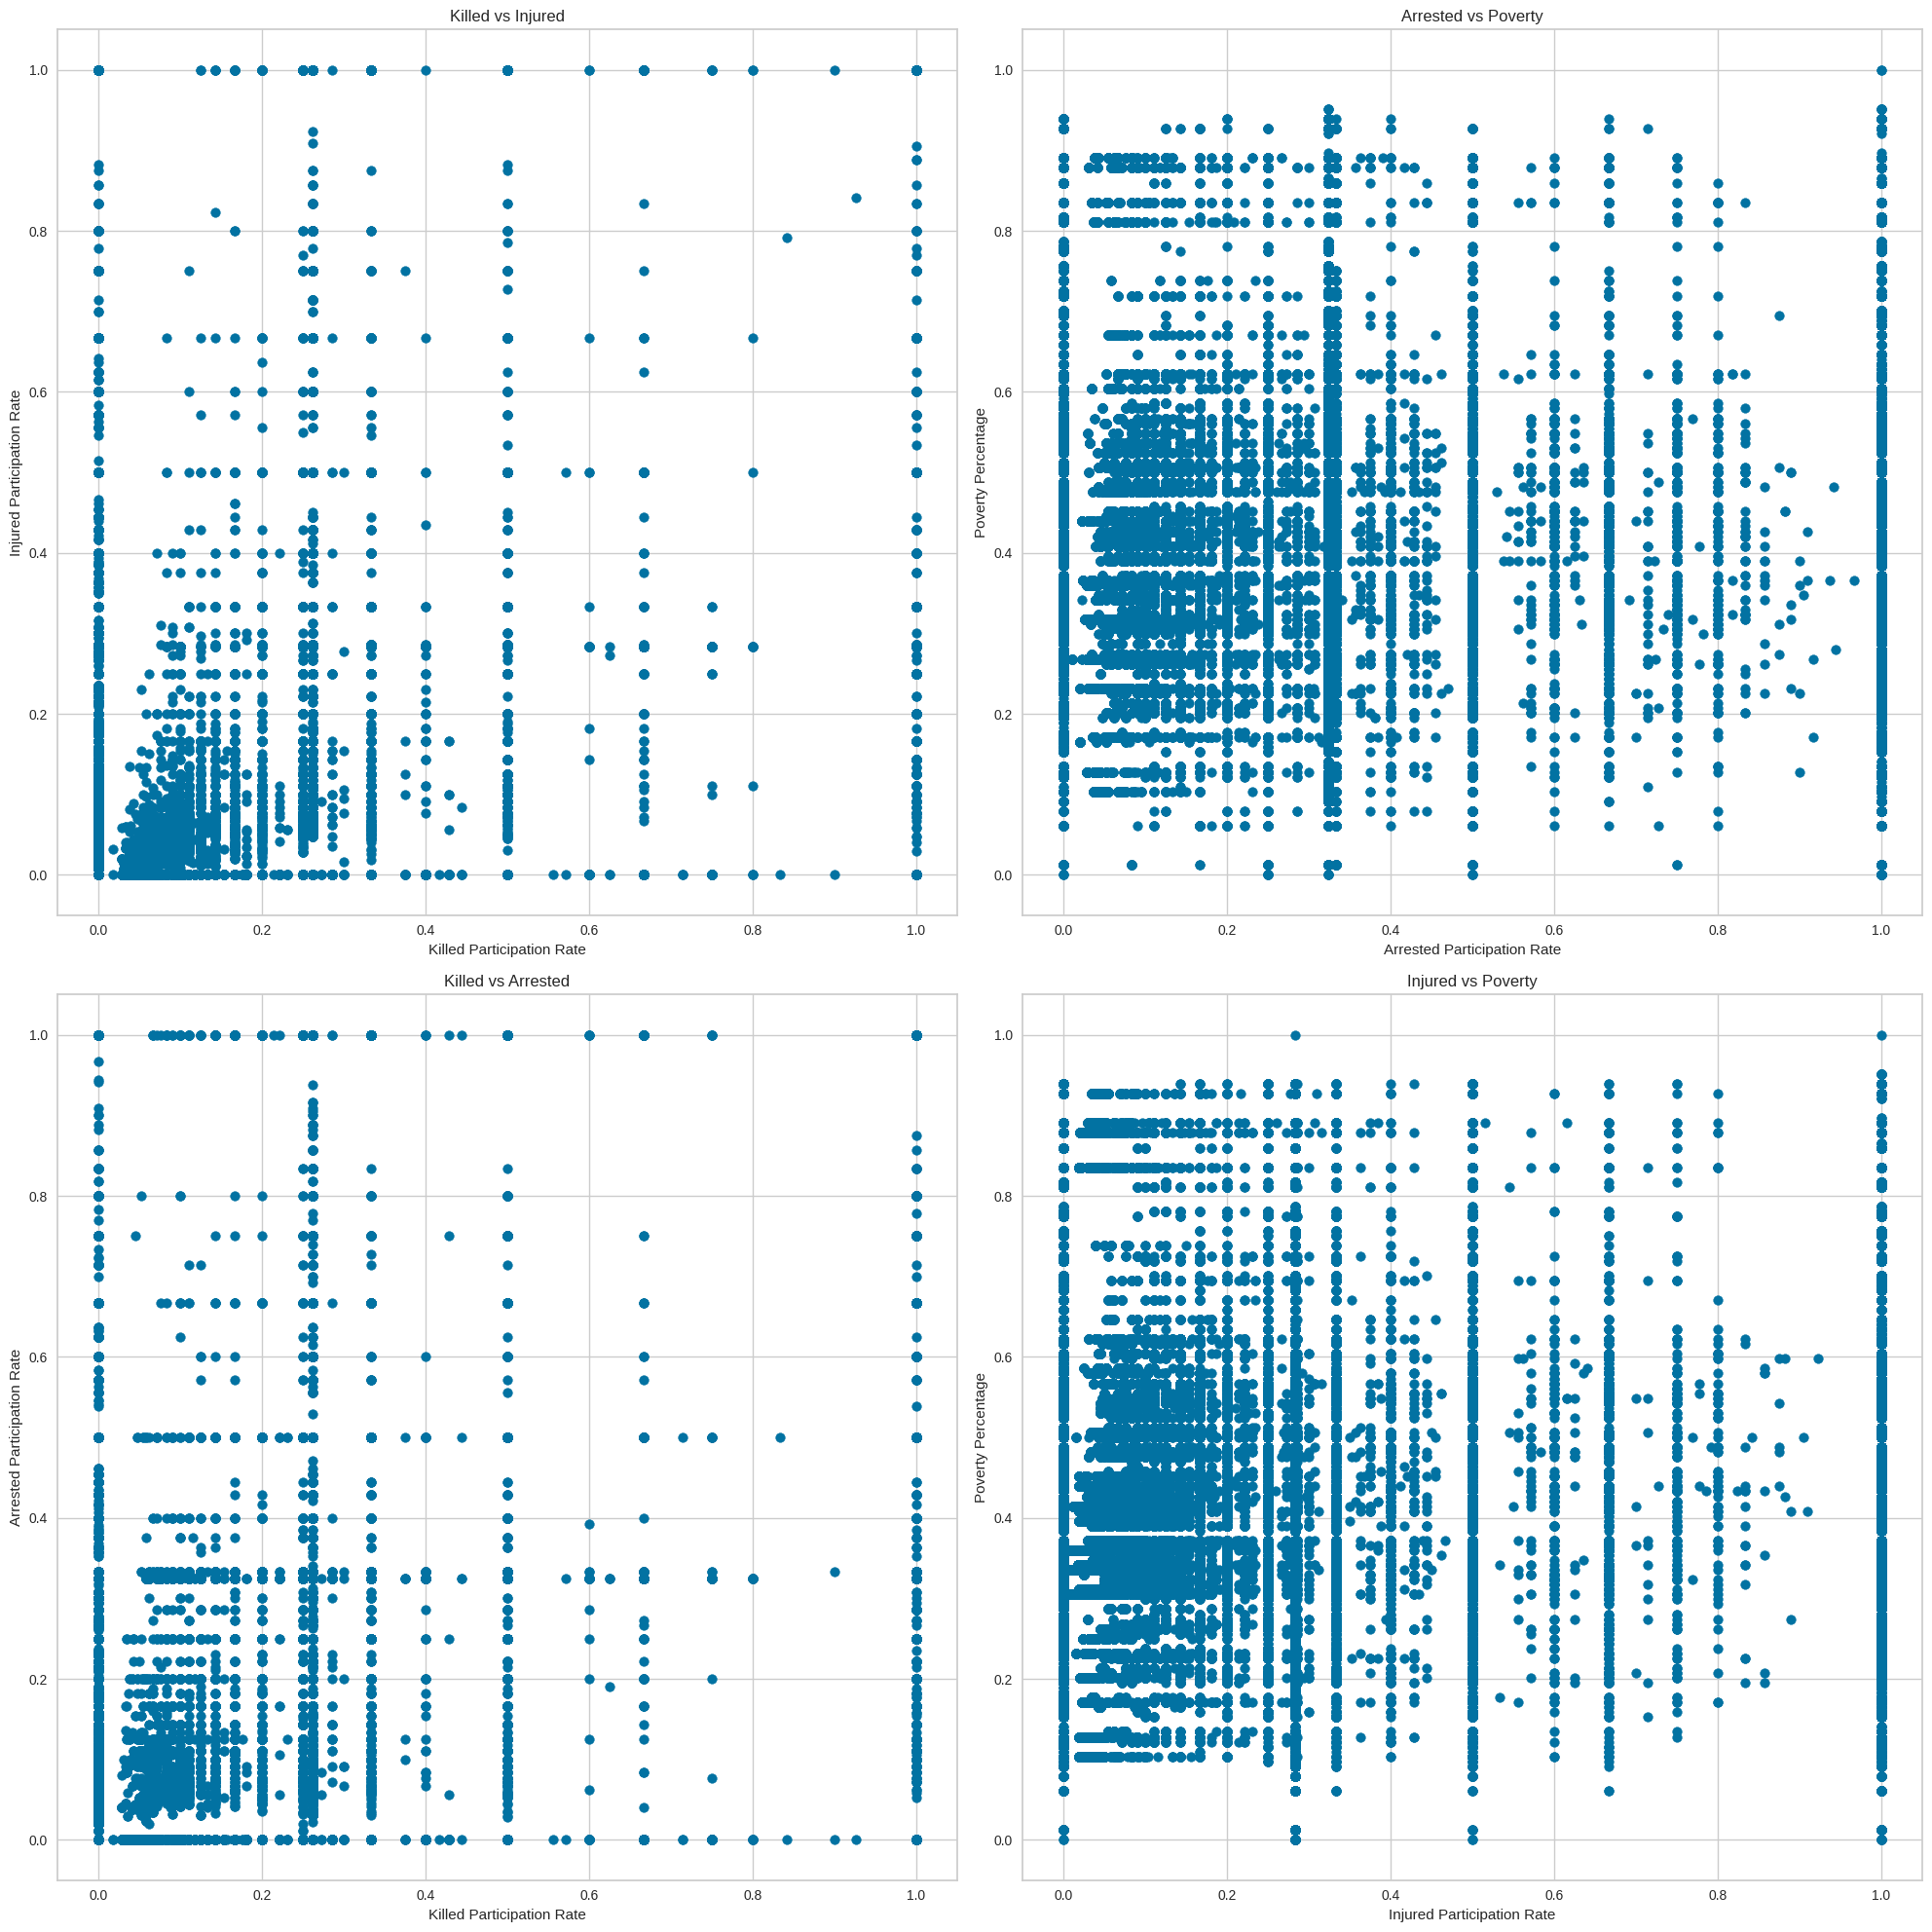

In [ ]:
import matplotlib.pyplot as plt

# all the features
plt.figure(figsize=(20, 20))

# 1c
plt.subplot(2, 2, 1)
plt.scatter(df_cluster_normalized['killed_participation_rate'], df_cluster_normalized['injuredd_participation_rate'])
plt.title('Killed vs Injured')
plt.xlabel('Killed Participation Rate')
plt.ylabel('Injured Participation Rate')

# 2c
plt.subplot(2, 2, 2)
plt.scatter(df_cluster_normalized['arrested_participation_rate'], df_cluster_normalized['povertyPercentage'])
plt.title('Arrested vs Poverty')
plt.xlabel('Arrested Participation Rate')
plt.ylabel('Poverty Percentage')

# 3c
plt.subplot(2, 2, 3)
plt.scatter(df_cluster_normalized['killed_participation_rate'], df_cluster_normalized['arrested_participation_rate'])
plt.title('Killed vs Arrested')
plt.xlabel('Killed Participation Rate')
plt.ylabel('Arrested Participation Rate')

# 4c
plt.subplot(2, 2, 4)
plt.scatter(df_cluster_normalized['injuredd_participation_rate'], df_cluster_normalized['povertyPercentage'])
plt.title('Injured vs Poverty')
plt.xlabel('Injured Participation Rate')
plt.ylabel('Poverty Percentage')

plt.tight_layout()
plt.show()



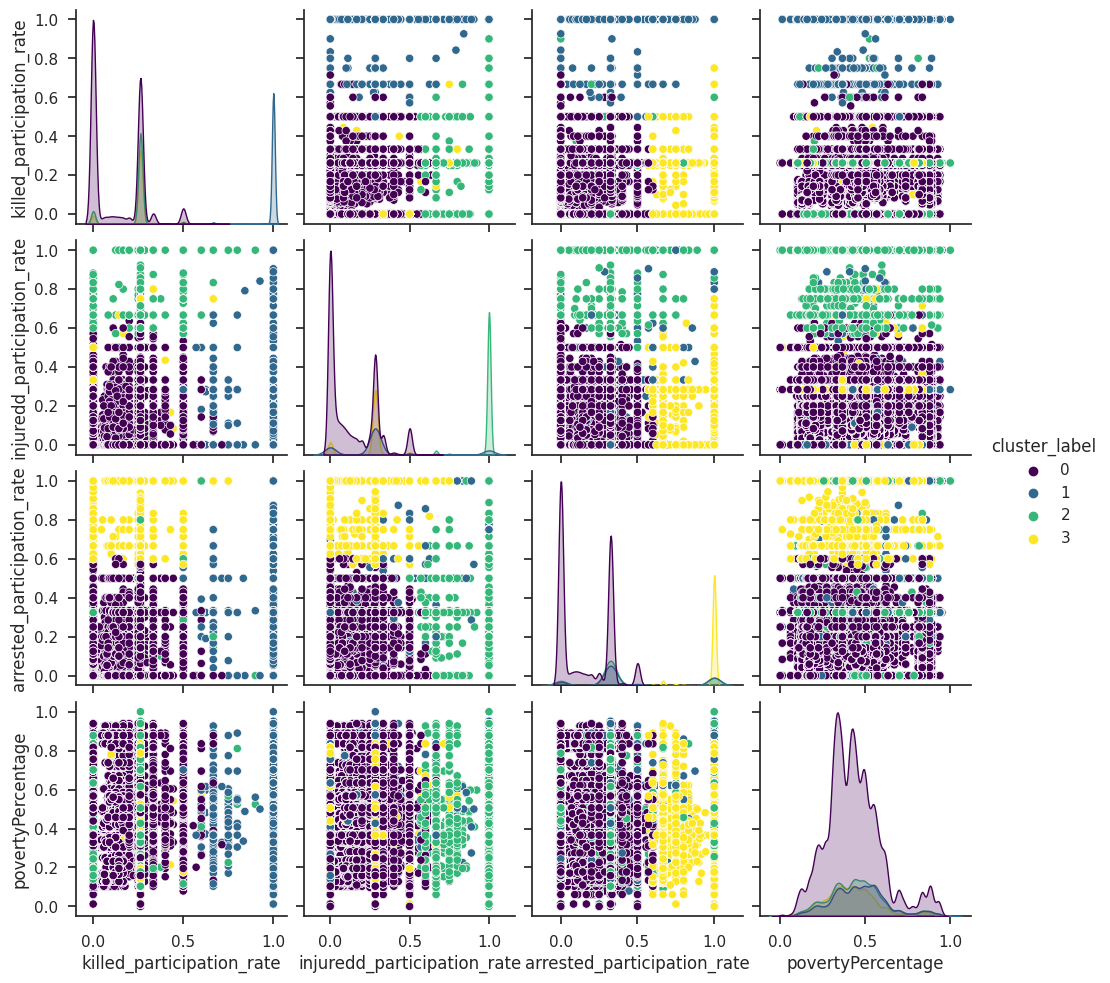

In [ ]:
import seaborn as sns

selected_columns = ['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']
selected_data = df_cluster_normalized[selected_columns]

selected_data['cluster_label'] = df_cluster_normalized['kmeans_4']

# seaborn for the plot
sns.set(style="ticks")
sns.pairplot(selected_data, hue='cluster_label', palette='viridis')
plt.show()


#Centroidi

In [ ]:
optimal_k = 4  # Numero ottimale di cluster
kmeans = KMeans(n_clusters=optimal_k, n_init=10, max_iter=100, init="k-means++")
kmeans.fit(df_cluster_normalized)
centroids = kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


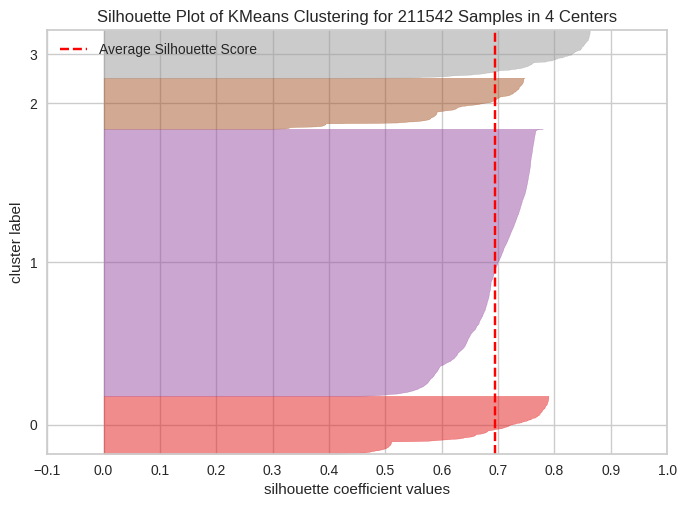

Il punteggio di silhouette è: 0.6947722391810285


In [ ]:
from yellowbrick.cluster import silhouette_visualizer

x = silhouette_visualizer(KMeans(optimal_k, random_state=42), df_cluster_normalized)
print("Il punteggio di silhouette è: " + str(x.silhouette_score_))


In [ ]:
#K means with the centroids
from sklearn.cluster import KMeans
num_clusters_optimal = 4
#  KMeans
kmeans = KMeans(n_clusters=num_clusters_optimal, random_state=42)
df_cluster_normalized['cluster_label'] = kmeans.fit_predict(df_cluster_normalized[['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


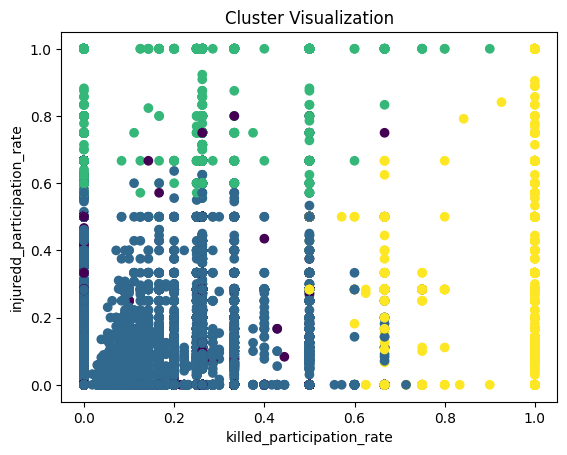

In [ ]:
plt.scatter(df_cluster_normalized['killed_participation_rate'], df_cluster_normalized['injuredd_participation_rate'], c=df_cluster_normalized['cluster_label'], cmap='viridis')
plt.xlabel('killed_participation_rate')
plt.ylabel('injuredd_participation_rate')
plt.title('Cluster Visualization')
plt.show()


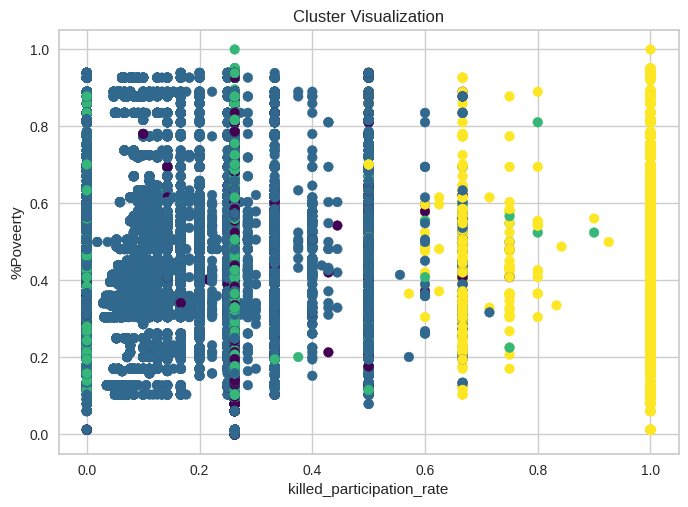

In [ ]:
plt.scatter(df_cluster_normalized['killed_participation_rate'], df_cluster_normalized['povertyPercentage'], c=df_cluster_normalized['cluster_label'], cmap='viridis')
plt.xlabel('killed_participation_rate')
plt.ylabel('%Poveerty')
plt.title('Cluster Visualization')
plt.show()


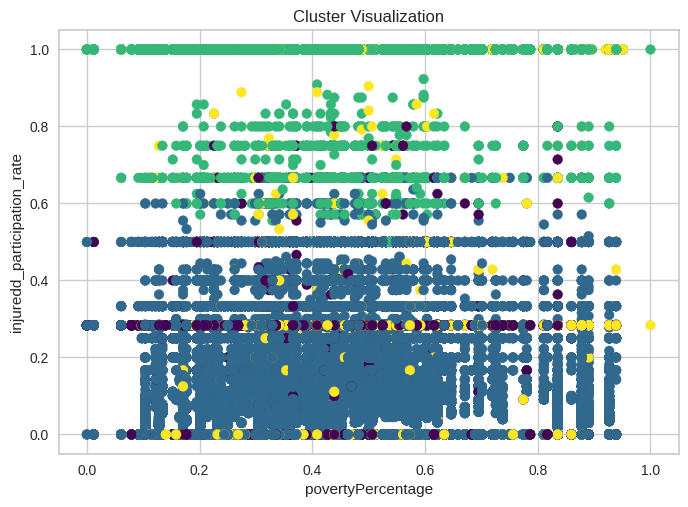

In [ ]:
plt.scatter(df_cluster_normalized['povertyPercentage'], df_cluster_normalized['injuredd_participation_rate'], c=df_cluster_normalized['cluster_label'], cmap='viridis')
plt.xlabel('povertyPercentage')
plt.ylabel('injuredd_participation_rate')
plt.title('Cluster Visualization')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


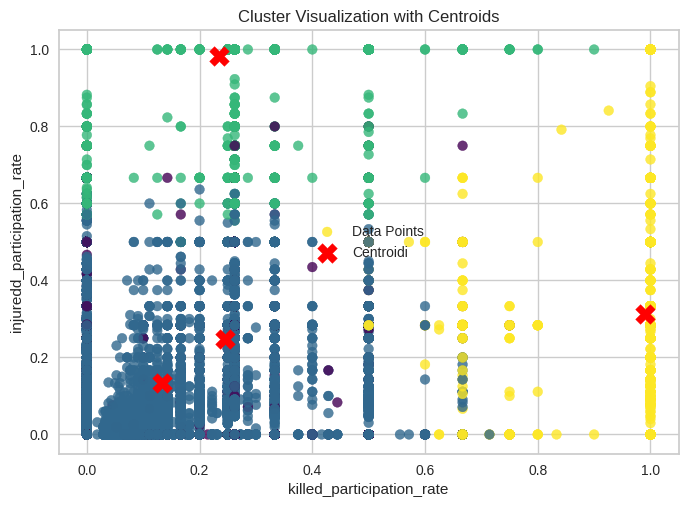

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


features = ['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']

#   KMeans
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_cluster_normalized[features])

#  i centroidi
centroids = kmeans.cluster_centers_

#  una palette di colori per i cluster
cluster_palette = sns.color_palette('viridis', as_cmap=True)

# Scatter plot con colorazione basata sui cluster
plt.scatter(df_cluster_normalized['killed_participation_rate'], df_cluster_normalized['injuredd_participation_rate'], c=df_cluster_normalized['cluster_label'], cmap='viridis', label='Data Points', alpha=0.8)

# Scatter plot per i centroidi
plt.scatter(centroids[:, df_cluster_normalized.columns.get_loc('killed_participation_rate')], centroids[:, df_cluster_normalized.columns.get_loc('injuredd_participation_rate')], marker='X', s=200, color='red', label='Centroidi')

plt.xlabel('killed_participation_rate')
plt.ylabel('injuredd_participation_rate')
plt.title('Cluster Visualization with Centroids')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


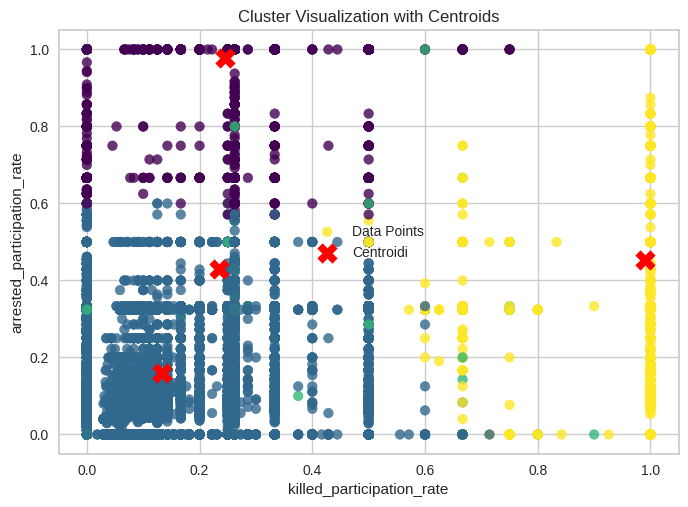

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definisci le feature
features = ['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']

#  il modello KMeans
num_clusters = 4  # Sostituisci con il numero di cluster ottimale
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_cluster_normalized[features])

#  i centroidi
centroids = kmeans.cluster_centers_

#  una palette di colori per i cluster
cluster_palette = sns.color_palette('viridis', as_cmap=True)

# Scatter plot con colorazione basata sui cluster
plt.scatter(df_cluster_normalized['killed_participation_rate'], df_cluster_normalized['arrested_participation_rate'], c=df_cluster_normalized['cluster_label'], cmap='viridis', label='Data Points', alpha=0.8)

# Scatter plot per i centroidi
plt.scatter(centroids[:, df_cluster_normalized.columns.get_loc('killed_participation_rate')], centroids[:, df_cluster_normalized.columns.get_loc('arrested_participation_rate')], marker='X', s=200, color='red', label='Centroidi')

plt.xlabel('killed_participation_rate')
plt.ylabel('arrested_participation_rate')
plt.title('Cluster Visualization with Centroids')
plt.legend()
plt.show()


# killed_participation_rate vs arrested_participation_rate con KMeans Clustering

among the various considerations and analyzes made where we compared the different features. In the present scatter plot, we examined the distribution of the data with respect to the 'killed_participation_rate' and 'arrested_participation_rate' features, using the KMeans method to divide the data into four distinct clusters . What immediately emerges is the notable distinction between the clusters and the poor similarity between the two features considered. It is evident, from the clear separation between the data points, that there is a marked distinction between the clusters generated by KMeans. The data appears to aggregate into well-defined regions of the two-dimensional feature space.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


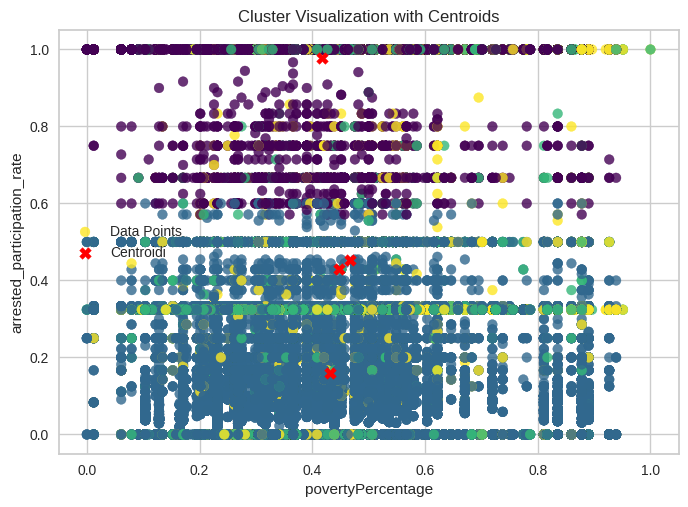

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definisci le feature
features = ['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']

#  il modello KMeans
num_clusters = 4  # Sostituisci con il numero di cluster ottimale
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_cluster_normalized[features])

#  i centroidi
centroids = kmeans.cluster_centers_

#  una palette di colori per i cluster
cluster_palette = sns.color_palette('viridis', as_cmap=True)

# Scatter plot con colorazione basata sui cluster
plt.scatter(df_cluster_normalized['povertyPercentage'], df_cluster_normalized['arrested_participation_rate'], c=df_cluster_normalized['cluster_label'], cmap='viridis', label='Data Points', alpha=0.8)

# Scatter plot per i centroidi
plt.scatter(centroids[:, df_cluster_normalized.columns.get_loc('povertyPercentage')], centroids[:, df_cluster_normalized.columns.get_loc('arrested_participation_rate')], marker='X', s=70, color='red', label='Centroidi')

plt.xlabel('povertyPercentage')
plt.ylabel('arrested_participation_rate')
plt.title('Cluster Visualization with Centroids')
plt.legend()
plt.show()


In the present scatter plot, we visualized the distribution of the data with respect to the features 'povertyPercentage' and 'arrested_participation_rate', using the KMeans method to divide the data into four distinct clusters. However, it is clear that there is significant overlap between the clusters, especially in the lower left part of the graph.

Interpretation:

Overlapping Clusters: The overlap between the clusters could indicate a similarity in the distribution of the data for the two features considered. In particular, it appears that some data points belonging to different clusters have similar values ​​for both 'povertyPercentage' and 'arrested_participation_rate'.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


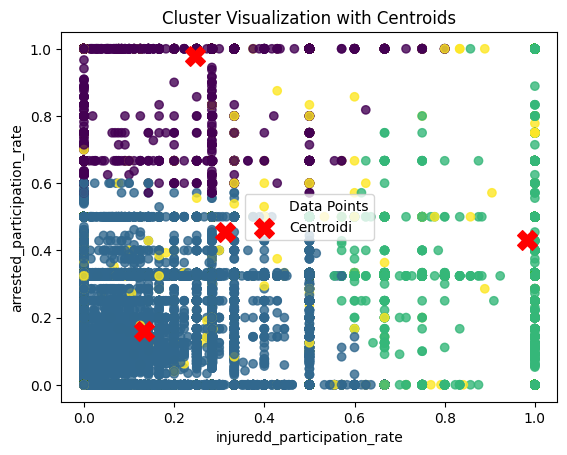

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definisci le feature
features = ['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']

#  il modello KMeans
num_clusters = 4  # Sostituisci con il numero di cluster ottimale
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_cluster_normalized[features])

#  i centroidi
centroids = kmeans.cluster_centers_

#  una palette di colori per i cluster
cluster_palette = sns.color_palette('viridis', as_cmap=True)

# Scatter plot con colorazione basata sui cluster
plt.scatter(df_cluster_normalized['injuredd_participation_rate'], df_cluster_normalized['arrested_participation_rate'], c=df_cluster_normalized['cluster_label'], cmap='viridis', label='Data Points', alpha=0.8)

# Scatter plot per i centroidi
plt.scatter(centroids[:, df_cluster_normalized.columns.get_loc('injuredd_participation_rate')], centroids[:, df_cluster_normalized.columns.get_loc('arrested_participation_rate')], marker='X', s=200, color='red', label='Centroidi')

plt.xlabel('injuredd_participation_rate')
plt.ylabel('arrested_participation_rate')
plt.title('Cluster Visualization with Centroids')
plt.legend()
plt.show()


killed_participation_rate vs. injuredd_participation_rate: Questo plot confronta direttamente il numero di persone uccise con il numero di persone ferite.


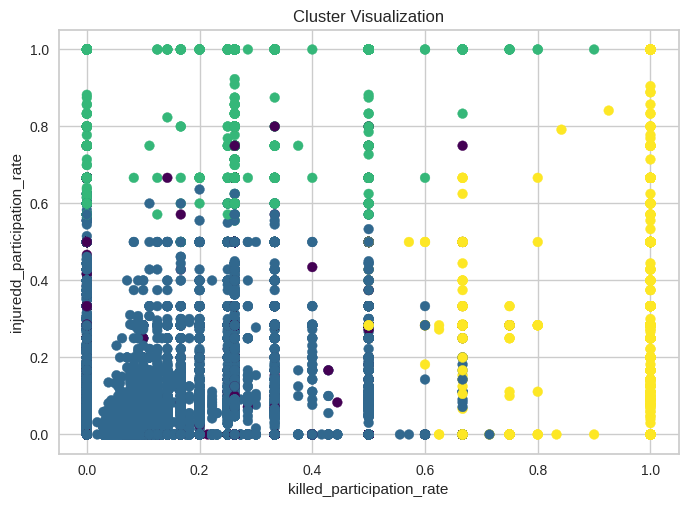

In [ ]:
plt.scatter(df_cluster_normalized['killed_participation_rate'], df_cluster_normalized['injuredd_participation_rate'], c=df_cluster_normalized['cluster_label'], cmap='viridis')
plt.xlabel('killed_participation_rate')
plt.ylabel('injuredd_participation_rate')
plt.title('Cluster Visualization')
plt.show()

#killed_participation_rate vs. arrested_participation_rate: Comparison between the number of people killed and the number of people arrested.

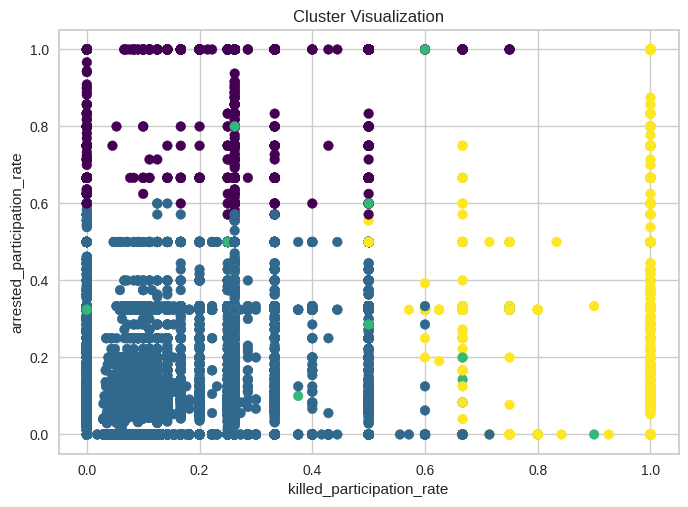

In [ ]:
plt.scatter(df_cluster_normalized['killed_participation_rate'], df_cluster_normalized['arrested_participation_rate'], c=df_cluster_normalized['cluster_label'], cmap='viridis')
plt.xlabel('killed_participation_rate')
plt.ylabel('arrested_participation_rate')
plt.title('Cluster Visualization')
plt.show()



#killed_participation_rate vs. povertyPercentage: Explores the relationship between the number of people killed and the poverty percentage.

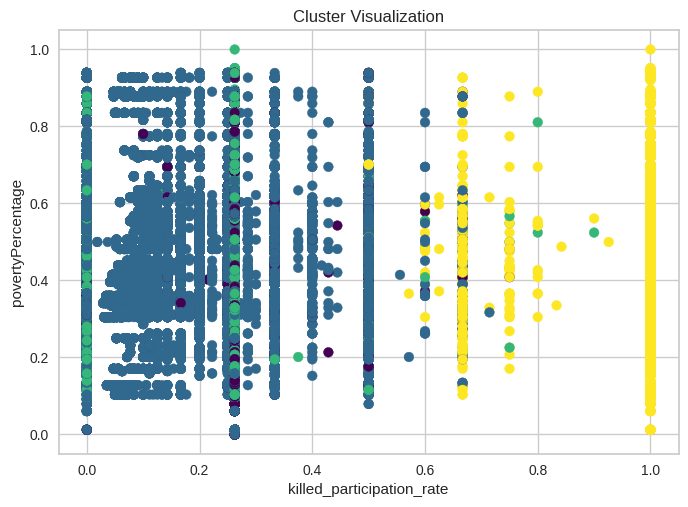

In [ ]:
plt.scatter(df_cluster_normalized['killed_participation_rate'], df_cluster_normalized['povertyPercentage'], c=df_cluster_normalized['cluster_label'], cmap='viridis')
plt.xlabel('killed_participation_rate')
plt.ylabel('povertyPercentage')
plt.title('Cluster Visualization')
plt.show()

povertyPercentage vs. arrested_participation_rate:
Exploring the relationship between the percentage of poverty and the percentage of people arrested can reveal how economic status affects criminal activity and law enforcement intervention.

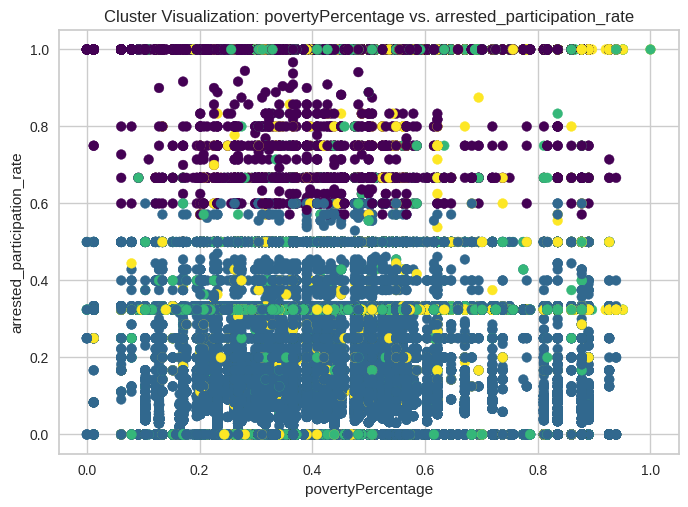

In [ ]:
plt.scatter(df_cluster_normalized['povertyPercentage'], df_cluster_normalized['arrested_participation_rate'], c=df_cluster_normalized['cluster_label'], cmap='viridis')
plt.xlabel('povertyPercentage')
plt.ylabel('arrested_participation_rate')
plt.title('Cluster Visualization: povertyPercentage vs. arrested_participation_rate')
plt.show()


there is no clear separation between the clusters with respect to these two features. This phenomenon may be due to several reasons:

Cluster overlap: Clusters may overlap significantly, making it difficult to distinguish the boundaries between them.

Low distinction between features: The features used may not be strongly indicative of different classes of observations. In other words, changes in “povertyPercentage” may not be strongly correlated with changes in “arrested_participation_rate”.

Centroidi:
[[0.24430846 0.24731246 0.97835103 0.41684312]
 [0.13262883 0.13323931 0.15994082 0.43185283]
 [0.23377489 0.98195807 0.43067283 0.44682715]
 [0.99053144 0.31266258 0.45358651 0.46607892]]


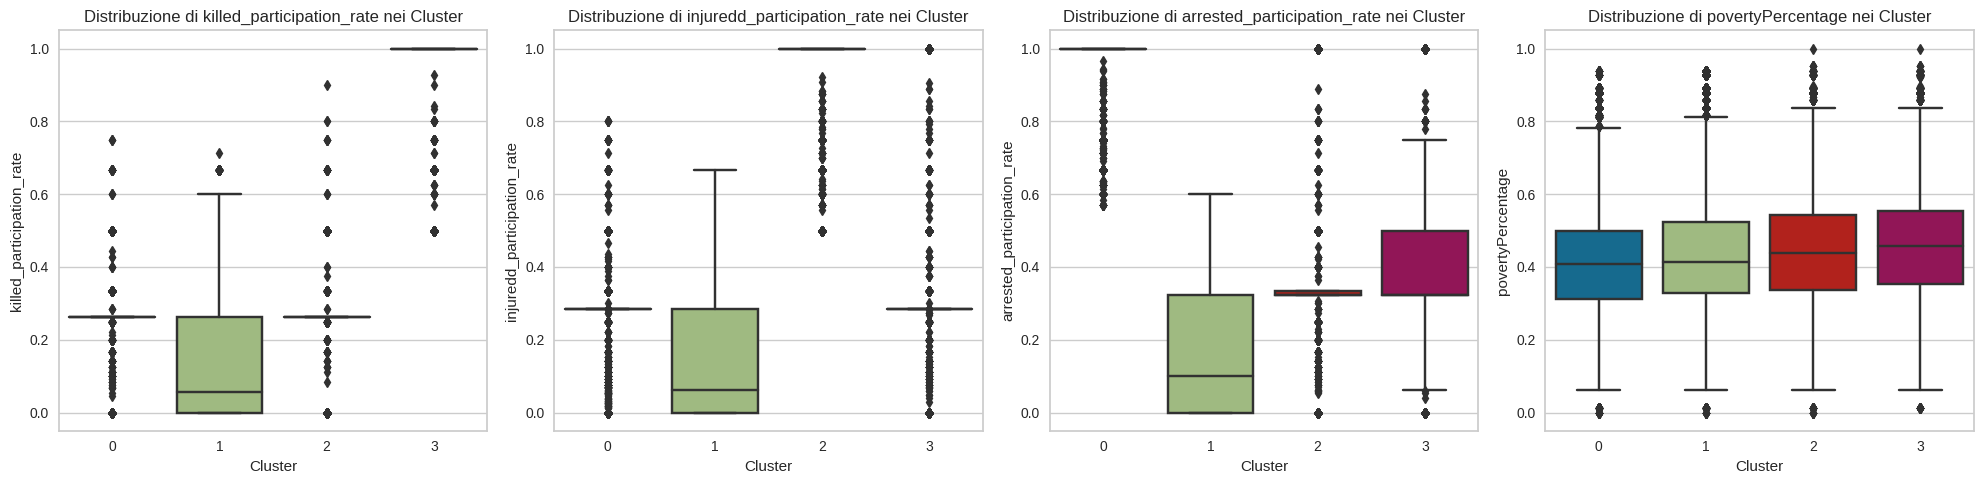

In [ ]:
import seaborn as sns
features = ['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']

centroids = kmeans.cluster_centers_
print("Centroidi:")
print(centroids)

# Analisi della Distribuzione delle Variabili
fig, axs = plt.subplots(nrows=1, ncols=len(features), figsize=(20, 5))
for i, feature in enumerate(features):
    sns.boxplot(x='cluster_label', y=feature, data=df_cluster_normalized, ax=axs[i])
    axs[i].set_xlabel('Cluster')
    axs[i].set_ylabel(feature)
    axs[i].set_title(f'Distribuzione di {feature} nei Cluster')

plt.tight_layout()
plt.show()


un subplot con tutti i possibili scatter plot tra le coppie di feature

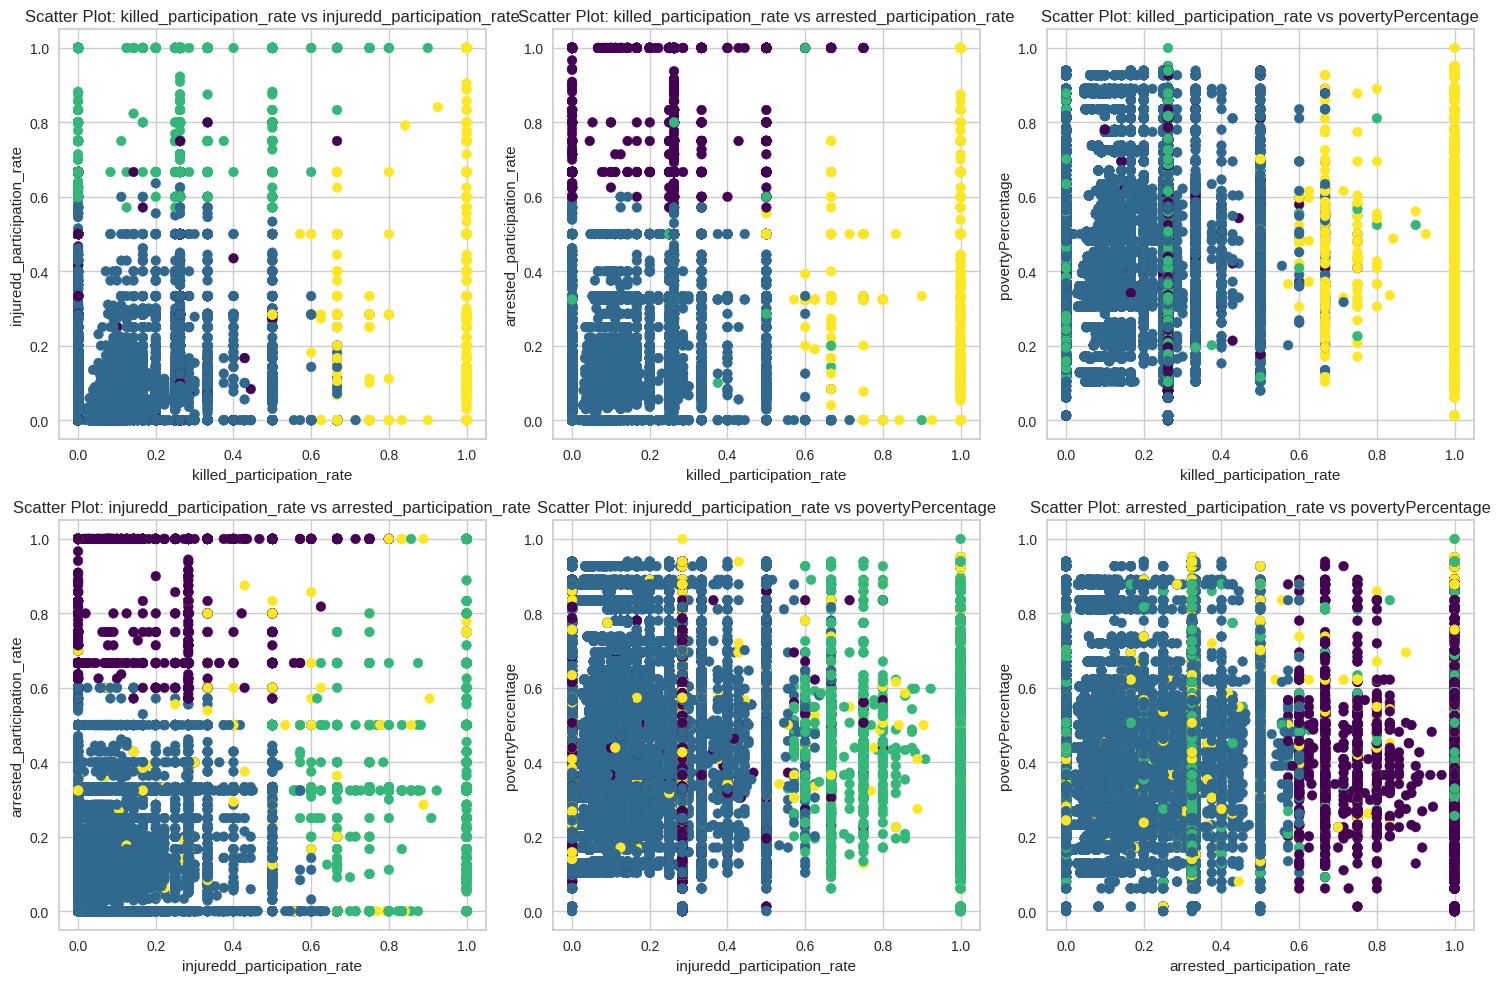

In [ ]:
import itertools

features = ['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']
combinations = list(itertools.combinations(features, 2))

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, combination in enumerate(combinations):
    ax = axs[i // 3, i % 3]
    ax.scatter(df_cluster_normalized[combination[0]], df_cluster_normalized[combination[1]], c=df_cluster_normalized['cluster_label'], cmap='viridis')
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.set_title(f'Scatter Plot: {combination[0]} vs {combination[1]}')

plt.tight_layout()
plt.show()


Confronto della Distribuzione delle Variabili:

 panoramica delle medie delle feature per ciascun cluster. Potrebbe aiutarti a identificare quali cluster hanno valori più alti o più bassi per specifiche feature.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


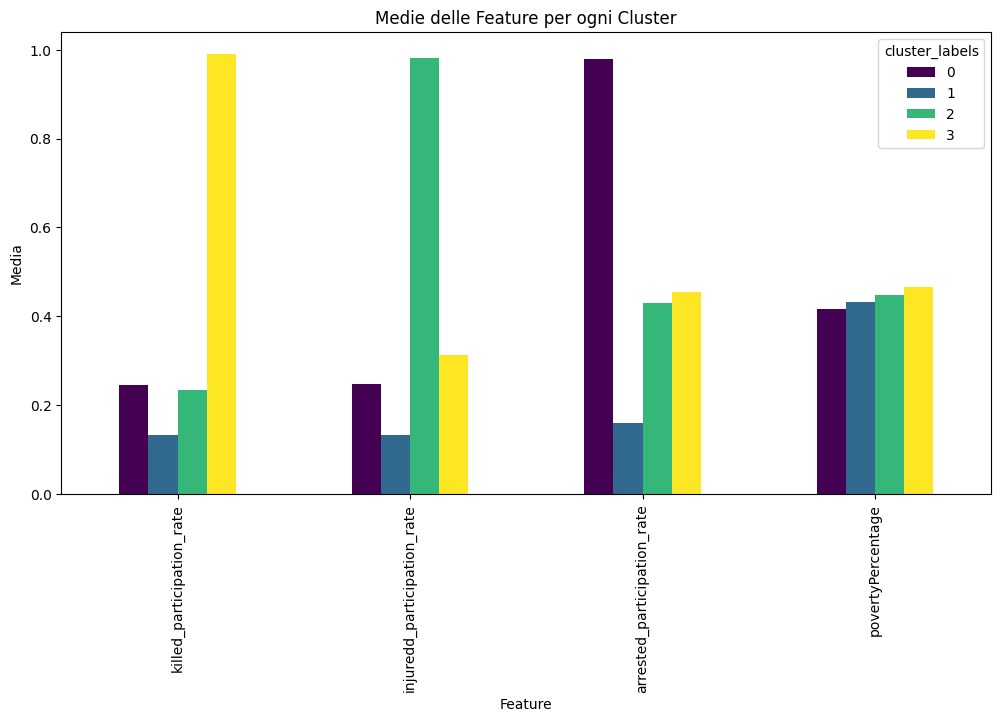

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


features = ['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']


num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_cluster_normalized[features])

# labeels
df_cluster_normalized['cluster_labels'] = kmeans.labels_

#
cluster_stats = df_cluster_normalized.groupby('cluster_labels')[features].describe()

#
cluster_means = df_cluster_normalized.groupby('cluster_labels')[features].mean()

# Plot delle medie delle feature per ogni cluster
cluster_means.T.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Medie delle Feature per ogni Cluster')
plt.xlabel('Feature')
plt.ylabel('Media')
plt.show()


 può darti un'indicazione di dove si trovano le "centrali" di ciascun cluster nello spazio delle feature.

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)


[[0.24430846 0.24731246 0.97835103 0.41684312]
 [0.13262883 0.13323931 0.15994082 0.43185283]
 [0.23377489 0.98195807 0.43067283 0.44682715]
 [0.99053144 0.31266258 0.45358651 0.46607892]]


In [ ]:
cluster_stats = df_cluster_normalized.groupby('cluster_label')[features].describe()
dataset_stats = dfinal[features].describe()

print("Statistiche Descrittive per i Cluster:")
print(cluster_stats)

print("\nStatistiche Descrittive per l'Intero Dataset:")
print(dataset_stats)



Statistiche Descrittive per i Cluster:
              killed_participation_rate                                     \
                                  count      mean       std  min       25%   
cluster_label                                                                
0                               23717.0  0.244308  0.089652  0.0  0.262363   
1                              133411.0  0.132627  0.146036  0.0  0.000000   
2                               28920.0  0.233759  0.091872  0.0  0.262363   
3                               25494.0  0.990519  0.062226  0.5  1.000000   

                                            injuredd_participation_rate  \
                    50%       75%       max                       count   
cluster_label                                                             
0              0.262363  0.262363  0.750000                     23717.0   
1              0.055556  0.262363  0.714286                    133411.0   
2              0.262363  0.262363  0.90

valutazione dei risultati del clustering

SSE

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_cluster_normalized[features], df_cluster_normalized['cluster_label'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5056252510508312


In [ ]:
from sklearn.cluster import KMeans

#
num_clusters = 4

# Crea e addestra il modello KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_cluster_normalized[features])

# Ottieni l'Inertia (SSE)
sse = kmeans.inertia_

print(f"Inertia (SSE - Sum of Squared Errors): {sse}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia (SSE - Sum of Squared Errors): 23597.847902088204


The analysis above is better explained by the polar plot.

In [ ]:
centroids_transposed = centroids.T


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


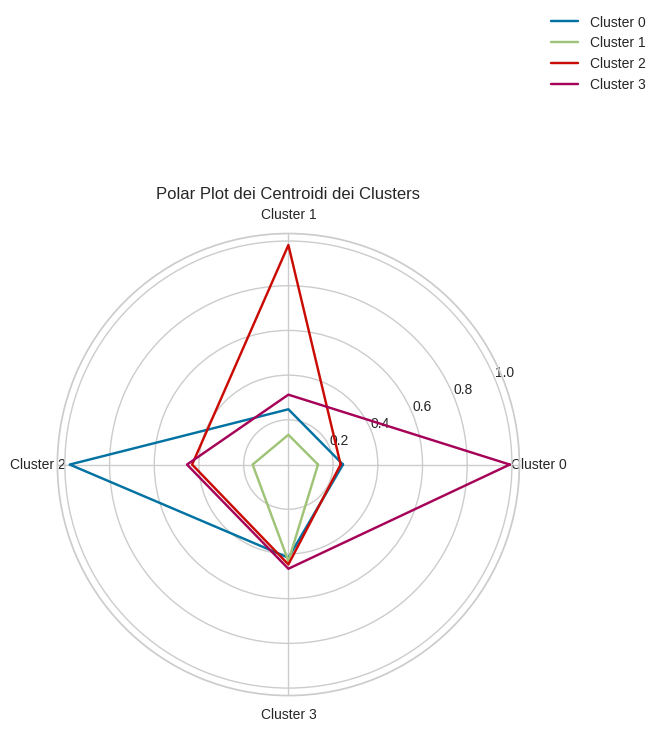

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_cluster_normalized[features])

# Ottieni i centroidi
centroids = kmeans.cluster_centers_

# Angoli per i clusters
angles = np.linspace(0, 2 * np.pi, num_clusters, endpoint=False)

# Creazione di un subplot polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 6))

# plotting the centroids
for i, centroid in enumerate(centroids):
    values = np.concatenate((centroid, [centroid[0]]))  # Chiudi il plot
    angles_extended = np.concatenate((angles, [angles[0]]))  # Chiudi il plot
    ax.plot(angles_extended, values, label=f'Cluster {i}')

#  labels  clusters
ax.set_thetagrids(angles * 180 / np.pi, [f'Cluster {i}' for i in range(num_clusters)])

#info for the clusters
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.5))

#  plot
plt.title('Polar Plot dei Centroidi dei Clusters')
plt.show()


Using Similarity Matrix for Cluster Validation: if we have well-separated clusters, then the similarity matrix should be roughly block-diagonal. The indices are sorted according to the labels of the clusters

## DBSCAN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import geopandas as gpd

import pandas as pd

dfinal = pd.read_csv('/content/drive/MyDrive/DM-PRJ/feature_dataset++V2.csv')

dfinal.head()


index       state city_or_county  congressional_district  year  month  \
0   11499  CALIFORNIA      Hawthorne                      43  2013      1   
1   27292    COLORADO         Aurora                       6  2013      1   
2   92001   LOUISIANA      Charenton                       3  2013      1   
3   91993   LOUISIANA    New Orleans                       2  2013      1   
4  100495    MARYLAND      Baltimore                       7  2013      1   

   male_participation_rate  female_participation_rate  \
0                      1.0                   0.229755   
1                      1.0                   1.000000   
2                      1.0                   0.229755   
3                      1.0                   0.229755   
4                      1.0                   0.229755   

   killed_participation_rate  injuredd_participation_rate  \
0                   1.000000                     1.000000   
1                   1.000000                     0.283672   
2                   1.000000                     1.000000   
3                   0.262363                     1.000000   
4                   1.000000                     1.000000   

   killed/participants_rate  unharmed_rate  adult_participation_rate  \
0                  0.200000            1.0                       1.0   
1                  1.000000            1.0                       1.0   
2                  0.400000            1.0                       1.0   
3                  0.000000            1.0                       1.0   
4                  0.142857            1.0                       1.0   

   teen_participation_rate  child_participation_rate  \
0                 0.160397                  0.125048   
1                 0.160397                  0.125048   
2                 0.160397                  0.125048   
3                 0.160397                  0.125048   
4                 1.000000                  0.125048   

   arrested_participation_rate  arrested/participants_rate       party  \
0                     0.324093                         0.0    DEMOCRAT   
1                     0.324093                         0.0  REPUBLICAN   
2                     1.000000                         0.2  REPUBLICAN   
3                     0.324093                         0.0    DEMOCRAT   
4                     0.324093                         0.0    DEMOCRAT   

   winnerParty_votes_percentage  n_participants  povertyPercentage  
0                      0.712430               5               14.9  
1                      0.478073               4               11.0  
2                      0.446776               5               21.0  
3                      0.551588               6               21.0  
4                      0.765152               7               10.0

#analysis on the state to select
We selected the state of ILLINOIS because in the Data Understanding phase we noticed a high number of incidents, therefore in the DBSCAN we could have large dimensional results on the clusters

In [ ]:
all_states = dfinal['state'].unique()
print(all_states)

['CALIFORNIA' 'COLORADO' 'LOUISIANA' 'MARYLAND' 'MISSOURI' 'NEW MEXICO'
 'NORTH CAROLINA' 'OHIO' 'OKLAHOMA' 'PENNSYLVANIA' 'TENNESSEE' 'DELAWARE'
 'GEORGIA' 'ILLINOIS' 'UTAH' 'DISTRICT OF COLUMBIA' 'FLORIDA' 'INDIANA'
 'MICHIGAN' 'MISSISSIPPI' 'NEW YORK' 'WASHINGTON' 'ARIZONA' 'KENTUCKY'
 'SOUTH CAROLINA' 'NEW JERSEY' 'VIRGINIA' 'RHODE ISLAND' 'TEXAS'
 'WISCONSIN' 'ALABAMA' 'CONNECTICUT' 'KANSAS' 'WEST VIRGINIA' 'MINNESOTA'
 'NEVADA' 'NEBRASKA' 'ALASKA' 'ARKANSAS' 'HAWAII' 'IDAHO' 'IOWA' 'MAINE'
 'MASSACHUSETTS' 'MONTANA' 'NEW HAMPSHIRE' 'NORTH DAKOTA' 'OREGON'
 'SOUTH DAKOTA' 'VERMONT' 'WYOMING']


In [ ]:

selected_state = 'ILLINOIS'

df_selected_state = dfinal[dfinal['state'] == selected_state].copy()

selected_features = ['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']
df_selected_state_features = df_selected_state[selected_features].copy()

df_selected_state.head(20)

index     state       city_or_county  congressional_district  year  \
19    61395  ILLINOIS              Chicago                       2  2013   
32    61390  ILLINOIS              Chicago                       1  2013   
45    61400  ILLINOIS  Chicago (Englewood)                       7  2013   
46    61393  ILLINOIS           Manchester                      18  2013   
59    61385  ILLINOIS              Chicago                       7  2013   
60    61392  ILLINOIS              Chicago                       7  2013   
82    61391  ILLINOIS              Chicago                       1  2013   
83    61396  ILLINOIS              Chicago                       1  2013   
84    61394  ILLINOIS              Chicago                       4  2013   
85    61387  ILLINOIS              Chicago                       7  2013   
86    61386  ILLINOIS              Chicago                       9  2013   
114   61402  ILLINOIS              Chicago                       1  2013   
115   61388  ILLINOIS              Chicago                       2  2013   
116   61401  ILLINOIS             Rockford                      17  2013   
143   61389  ILLINOIS              Chicago                       7  2013   
144   61399  ILLINOIS              Chicago                       9  2013   
172   61398  ILLINOIS              Chicago                       1  2013   
173   61397  ILLINOIS              Chicago                       3  2013   
1015  63394  ILLINOIS                Alton                      12  2014   
1016  61971  ILLINOIS               Aurora                      11  2014   

      month  male_participation_rate  female_participation_rate  \
19        2                 1.000000                   0.229755   
32        3                 1.000000                   1.000000   
45        4                 1.000000                   0.229755   
46        4                 1.000000                   1.000000   
59        5                 0.500000                   0.500000   
60        5                 0.500000                   0.500000   
82        6                 0.375000                   1.000000   
83        6                 0.625000                   0.000000   
84        6                 1.000000                   1.000000   
85        6                 1.000000                   1.000000   
86        6                 1.000000                   1.000000   
114       7                 1.000000                   1.000000   
115       7                 1.000000                   1.000000   
116       7                 1.000000                   0.229755   
143       8                 1.000000                   1.000000   
144       8                 1.000000                   0.229755   
172       9                 1.000000                   0.229755   
173       9                 1.000000                   1.000000   
1015      1                 1.000000                   1.000000   
1016      1                 0.166667                   1.000000   

      killed_participation_rate  injuredd_participation_rate  \
19                     0.262363                     1.000000   
32                     0.262363                     1.000000   
45                     0.262363                     1.000000   
46                     1.000000                     1.000000   
59                     0.262363                     0.500000   
60                     0.262363                     0.500000   
82                     0.500000                     0.571429   
83                     0.500000                     0.428571   
84                     1.000000                     1.000000   
85                     1.000000                     1.000000   
86                     0.262363                     1.000000   
114                    0.262363                     1.000000   
115                    0.262363                     1.000000   
116                    1.000000                     1.000000   
143                    1.000000          

#Grid search for min_samples and eps


#This code continues to explore new combinations of eps and min_samples in a loop.
calculates the silhouette score for each combination and returns the best parameters and the corresponding silhouette score. We can explore this grid further or add other values ​​to tailor it to your specific needs.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid


selected_state = 'ILLINOIS'

df_selected_state = dfinal[dfinal['state'] == selected_state].copy()


selected_features = ['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']
df_selected_state_features = df_selected_state[selected_features].copy()

scaler = StandardScaler()
df_selected_state_features_scaled = scaler.fit_transform(df_selected_state_features)

#  grid search
param_grid = {
    'eps': [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
    'min_samples': [2, 3, 4, 5, 6, 7, 8, 9]
}

best_score = -1  # Inizializza con un valore negativo
best_params = {}

# Esegui la grid search manualmente
for params in ParameterGrid(param_grid):
    dbscan_model = DBSCAN(**params)
    cluster_labels = dbscan_model.fit_predict(df_selected_state_features_scaled)

    # Calcola la silhouette score
    current_score = silhouette_score(df_selected_state_features_scaled, cluster_labels)

    # Aggiorna i migliori parametri se la nuova score è migliore
    if current_score > best_score:
        best_score = current_score
        best_params = params

# Stampa i risultati della grid search
print("Migliori parametri:", best_params)
print("Migliore silhouette score:", best_score)


Migliori parametri: {'eps': 0.2, 'min_samples': 6}
Migliore silhouette score: 0.5645864244060531


#heatmap per i best scores
we visualized the results of the GRID search through a heatmap to see how the Silhouette score changes as the parameters vary, using seaborn to view the heatmap

#Paramteres for grid search amplified
Parameters for the grid search:
min_samples: [2 3 4 5 6 7 8 9]
eps: [0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0. 85 0.9  0.95 1.  ]

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid


selected_state = 'ILLINOIS'

df_selected_state = dfinal[dfinal['state'] == selected_state].copy()


selected_features = ['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']
df_selected_state_features = df_selected_state[selected_features].copy()

# Normalizza le feature
scaler = StandardScaler()
df_selected_state_features_scaled = scaler.fit_transform(df_selected_state_features)

# Definisci i parametri da esplorare nella grid search
#indicativi e scelti a priori
param_grid = {
    'eps': [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
    'min_samples': [2, 3, 4, 5, 6, 7, 8, 9]
}

best_score = -1  # Inizializza con un valore negativo
best_params = {}

# Esegui la grid search
for params in ParameterGrid(param_grid):
    dbscan_model = DBSCAN(**params)
    cluster_labels = dbscan_model.fit_predict(df_selected_state_features_scaled)

    # Calcola la silhouette score
    current_score = silhouette_score(df_selected_state_features_scaled, cluster_labels)

    # Aggiorna i migliori parametri se la nuova score è migliore
    if current_score > best_score:
        best_score = current_score
        best_params = params

# Stampa i risultati della grid search
print("Migliori parametri:", best_params)
print("Migliore silhouette score:", best_score)


Migliori parametri: {'eps': 0.2, 'min_samples': 6}
Migliore silhouette score: 0.5645864244060531


We use this visualization to identify the parameters that maximize the silhouette score for our features but as we have seen previously the optimal values ​​obtained are Best parameters: {'eps': 0.2, 'min_samples': 6}
Best silhouette score: 0.5645864244060531

So when  apply DBSCAN to our features dataset, use eps=0.2 and min_samples=6. These are the parameters that, based on our analysis, lead to a better silhouette score, indicating good cohesion within clusters and good separation between clusters.

#iteration to find the best parameters
That's Because DBSCAN is known for its ability to identify the number of clusters dynamically, but the number of clusters may vary depending on the data density and parameter configuration.

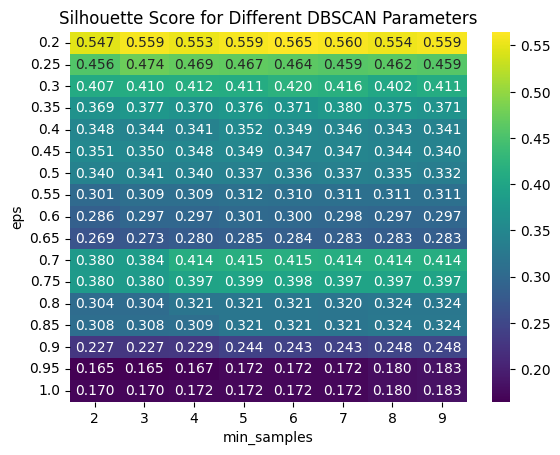

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

#
selected_state = 'ILLINOIS'

#
df_selected_state = dfinal[dfinal['state'] == selected_state].copy()

#
selected_features = ['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']
df_selected_state_features = df_selected_state[selected_features].copy()

#
scaler = StandardScaler()
df_selected_state_features_scaled = scaler.fit_transform(df_selected_state_features)

# Definisci i parametri da esplorare nella grid search
param_grid = {
    'eps': [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
    'min_samples': [2, 3, 4, 5, 6, 7, 8, 9]
}

#
results_matrix = np.zeros((len(param_grid['eps']), len(param_grid['min_samples'])))

# Esegui la grid search manualmente
for i, eps in enumerate(param_grid['eps']):
    for j, min_samples in enumerate(param_grid['min_samples']):
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan_model.fit_predict(df_selected_state_features_scaled)

        # Calcola la silhouette score
        current_score = silhouette_score(df_selected_state_features_scaled, cluster_labels)

        # Salva il risultato nella matrice
        results_matrix[i, j] = current_score

# Crea una heatmap
sns.heatmap(results_matrix, annot=True, fmt=".3f", xticklabels=param_grid['min_samples'], yticklabels=param_grid['eps'], cmap="viridis")
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('Silhouette Score for Different DBSCAN Parameters')
plt.show()


In [ ]:
# Appli DBSCAN
eps = 0.2
min_samples = 6

dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_model.fit(df_selected_state_features_scaled)

#  silhouette score
silhouette = silhouette_score(df_selected_state_features_scaled, dbscan_model.labels_)

print('Silhouette Score:', silhouette)


Silhouette Score: 0.5645864244060531


A silhouette score of 0.5645864244060531 is considered good enough
Good. This value indicates the clusters obtained through the DBSCAN for the status
of Illinois show good internal cohesion and significant separation between clusters.
the analysis and interpretation of the results obtained. You can explore the identified clusters,
examine the distribution of observations within each

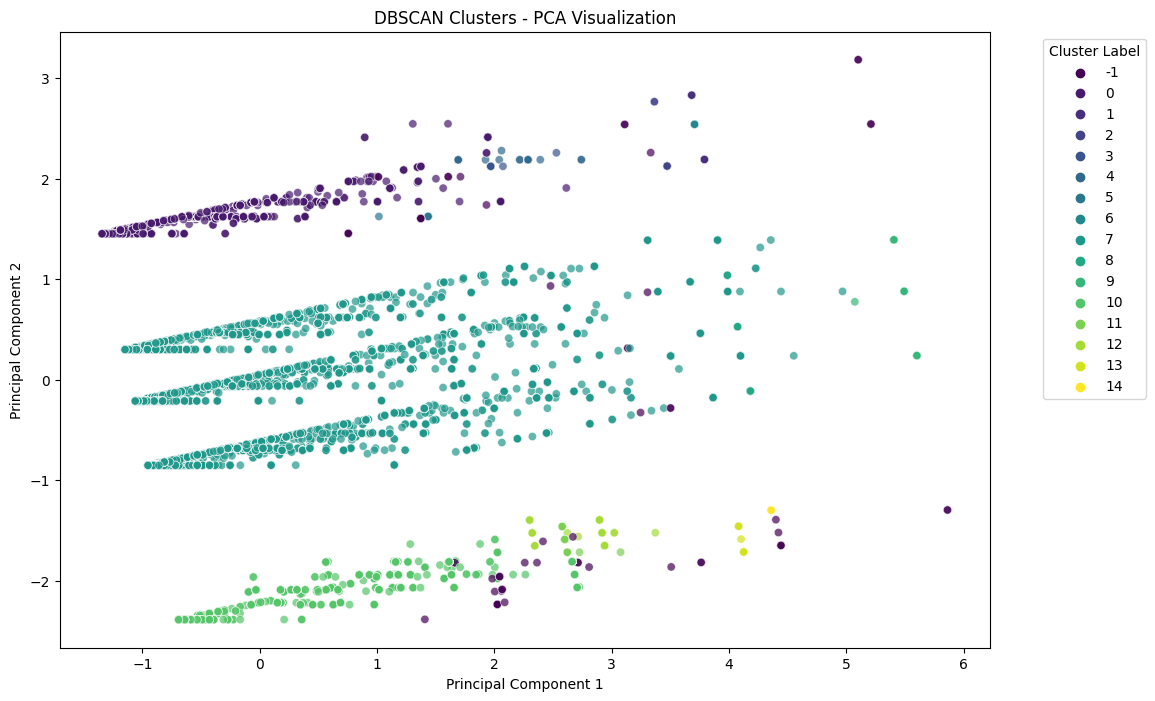

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_selected_state_features_scaled)

# Add the cluster labels to the DataFrame
df_selected_state['cluster_label'] = dbscan_model.labels_

# Plot the clusters
plt.figure(figsize=(12, 8))

# Use seaborn scatterplot with hue for coloring by cluster
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_selected_state['cluster_label'], palette='viridis', legend='full', alpha=0.7)

plt.title('DBSCAN Clusters - PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


#statistical analysis of the features within each cluster
DataFrame df_selected_state with the addition of the cluster_label column assigned by DBSCAN. The first part of the code calculates descriptive statistics such as mean, standard deviation, minimum, maximum, etc., for each feature within each cluster. The second part of the code calculates the averages for each feature within each cluster.


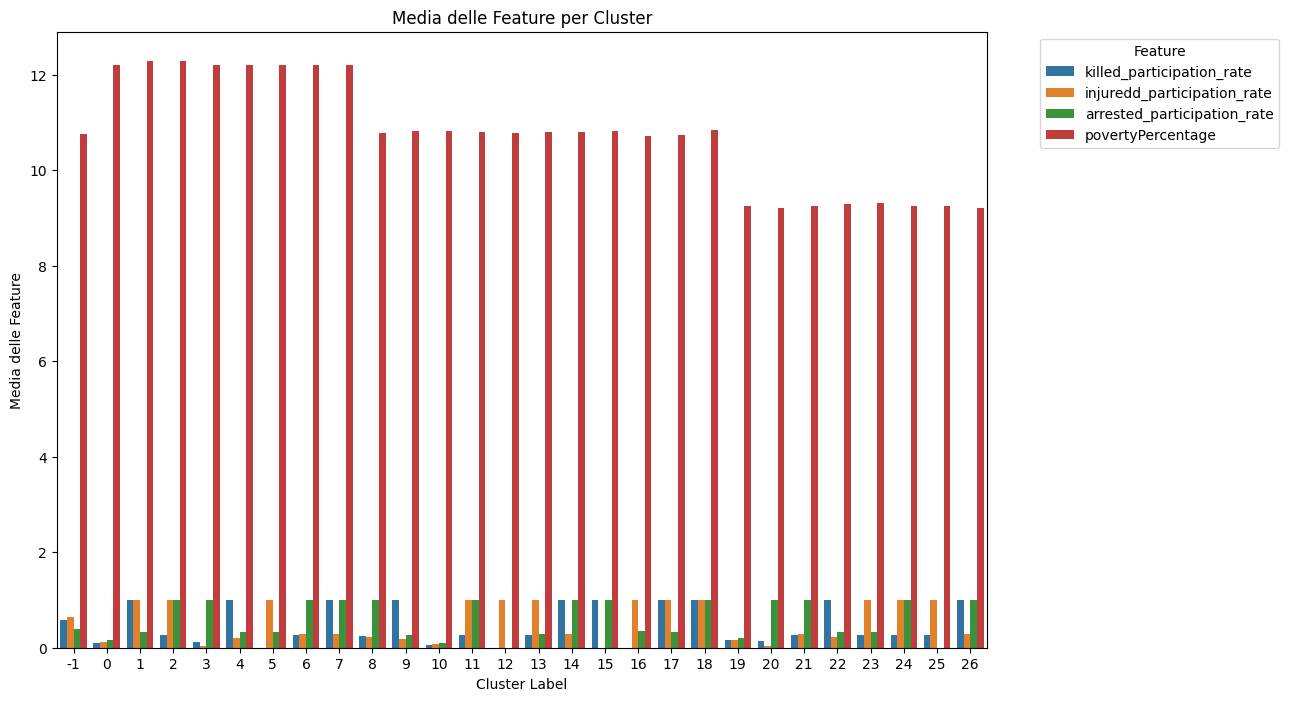

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola le medie per ciascuna feature all'interno di ciascun cluster
cluster_means = df_selected_state.groupby('cluster_label')[selected_features].mean().reset_index()

# Imposta la dimensione della figura
plt.figure(figsize=(12, 8))

# Crea un unico grafico a barre per tutte le feature
sns.barplot(x='cluster_label', y='value', hue='variable', data=pd.melt(cluster_means, id_vars='cluster_label'))

# Aggiungi titoli e legenda
plt.title('Media delle Feature per Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Media delle Feature')
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostra il grafico
plt.show()


there are 5 dense areas in the PCA plots, it could be an interesting indication of the structures. The 5 dense areas could represent regions of the state that share similar characteristics in the selected features. For example, they might correspond to areas with similar levels of crime, participation, or poverty that might correspond to specific geographic subdivisions in the state.

#Visualization of the distribution of the outliers


Outlier Analysis
While analyzing the clusters generated by DBSCAN, we identified outliers within the state of ILLINOIS. Outliers are those points that the model has assigned to the cluster labeled -1. These points are considered atypical compared to the other data and deserve special attention.

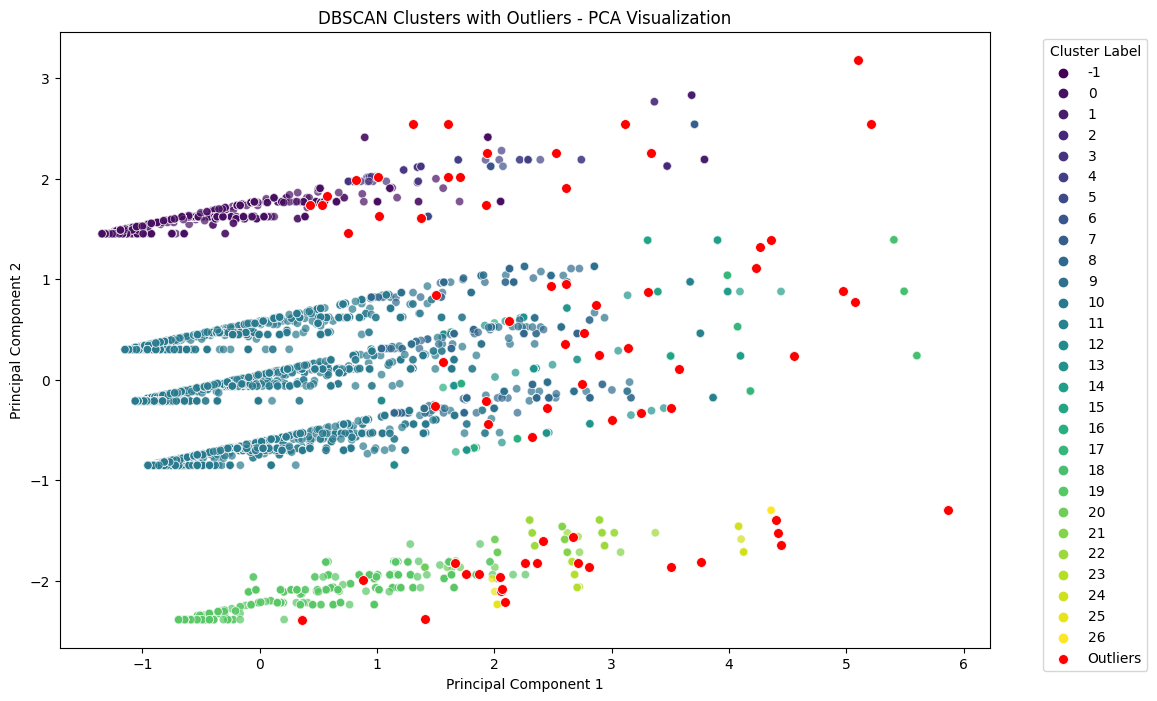

Distribuzione degli outliers per ciascun cluster:
-1    102
Name: cluster_label, dtype: int64


In [ ]:
# Utilizza i migliori parametri ottenuti dalla ricerca iterativa
dbscan_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
df_selected_state['cluster_label'] = dbscan_model.fit_predict(df_selected_state_features_scaled)

# Identifica gli outliers in ciascun cluster (cluster etichettati come -1)
outliers_mask = (df_selected_state['cluster_label'] == -1)
outliers = df_selected_state[outliers_mask]

# Visualizza gli outliers
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_selected_state['cluster_label'], palette='viridis', legend='full', alpha=0.7)

# Rappresenta gli outliers in rosso
sns.scatterplot(x=pca_result[outliers_mask, 0], y=pca_result[outliers_mask, 1], color='red', label='Outliers', s=50)

plt.title('DBSCAN Clusters with Outliers - PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Stampa la distribuzione degli outliers per ciascun cluster
outliers_distribution = outliers['cluster_label'].value_counts()
print("Distribuzione degli outliers per ciascun cluster:")
print(outliers_distribution)


Descriptive Statistics of Outliers by Feature
We calculated descriptive statistics for the outlier features. These statistics provide great insight into the distinguishing characteristics of these points.
Descriptive statistics include mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum for each feature. This information helps to understand the distribution and variability of outliers with respect to the selected features.

In [ ]:
outliers = df_selected_state[df_selected_state['cluster_label'] == -1]
outliers_stats = outliers[selected_features].describe()
print(outliers_stats)


       killed_participation_rate  injuredd_participation_rate  \
count                 102.000000                   102.000000   
mean                    0.587329                     0.647135   
std                     0.394787                     0.376505   
min                     0.000000                     0.000000   
25%                     0.262363                     0.296087   
50%                     0.500000                     0.708333   
75%                     1.000000                     1.000000   
max                     1.000000                     1.000000   

       arrested_participation_rate  povertyPercentage  
count                   102.000000         102.000000  
mean                      0.383771          10.759804  
std                       0.406082           1.269697  
min                       0.000000           9.200000  
25%                       0.000000           9.225000  
50%                       0.324093          10.900000  
75%                   

#Analysis of the outliers
Outliers, in the context of your features (killed_participation_rate, injured_participation_rate, arrested_participation_rate, povertyPercentage), are those points or observations that significantly deviate from the patterns generated by the other data. In our case, these points were assigned to the cluster labeled -1 by DBSCAN, which considers them atypical compared to the other data.

In [ ]:

print(outliers[['cluster_label'] + selected_features])


        cluster_label  killed_participation_rate  injuredd_participation_rate  \
82                 -1                   0.500000                     0.571429   
83                 -1                   0.500000                     0.428571   
84                 -1                   1.000000                     1.000000   
144                -1                   1.000000                     1.000000   
1016               -1                   0.500000                     0.283672   
1018               -1                   0.500000                     0.283672   
3679               -1                   0.250000                     0.000000   
3733               -1                   0.262363                     1.000000   
5811               -1                   0.262363                     1.000000   
8467               -1                   0.000000                     0.800000   
10847              -1                   0.262363                     1.000000   
13766              -1       

The analyzes above provide a detailed overview of outliers within the state of ILLINOIS, allowing for a better understanding of the unique characteristics of these spots and the patterns that may emerge within the clusters identified by DBSCAN.

#Hierarchical
we will use the hierarchical clustering with its differents methods.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
dfinal.head(10)

NameError: name 'dfinal' is not defined

#Data normalization:


We already had the normalization on the selected features

In [ ]:
df_cluster_normalized.head(10)

killed_participation_rate  injuredd_participation_rate  \
0                   1.000000                     1.000000   
1                   1.000000                     0.283672   
2                   1.000000                     1.000000   
3                   0.262363                     1.000000   
4                   1.000000                     1.000000   
5                   1.000000                     1.000000   
6                   1.000000                     0.283672   
7                   1.000000                     1.000000   
8                   1.000000                     1.000000   
9                   1.000000                     1.000000   

   arrested_participation_rate  povertyPercentage  
0                     0.324093           0.579268  
1                     0.324093           0.341463  
2                     1.000000           0.951220  
3                     0.324093           0.951220  
4                     0.324093           0.280488  
5                     0.324093           0.439024  
6                     1.000000           1.000000  
7                     0.324093           0.628049  
8                     1.000000           0.567073  
9                     1.000000           0.567073

#distance matrix
hierarchical clustering procedure. The distance matrix measures the dissimilarity between pairs of observations in the dataset.
clustering gerarchico utilizzano queste misure di dissimilarità per unire o separare i cluster durante il processo di costruzione dell'albero gerarchico.

we can use different dissimilarity metrics, such as Euclidean distance, Manhattan distance, correlation, etc.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #normalization
dhier = scaler.fit_transform(df_cluster_normalized)

NameError: name 'df_cluster_normalized' is not defined

Complete Linkage (complete): The distance between two clusters is defined as the maximum distance between the points of the two clusters.

Single Linkage (single): The distance between two clusters is defined as the minimum distance between the points of the two clusters.

Average Linkage (average): The distance between two clusters is defined as the average of the distances between the points of the two clusters.

Ward Linkage (ward): This method attempts to minimize the variance within clusters. It is based on the sum of squares difference between the clusters obtained by adding the new cluster and the sum of squares of the previous clusters.

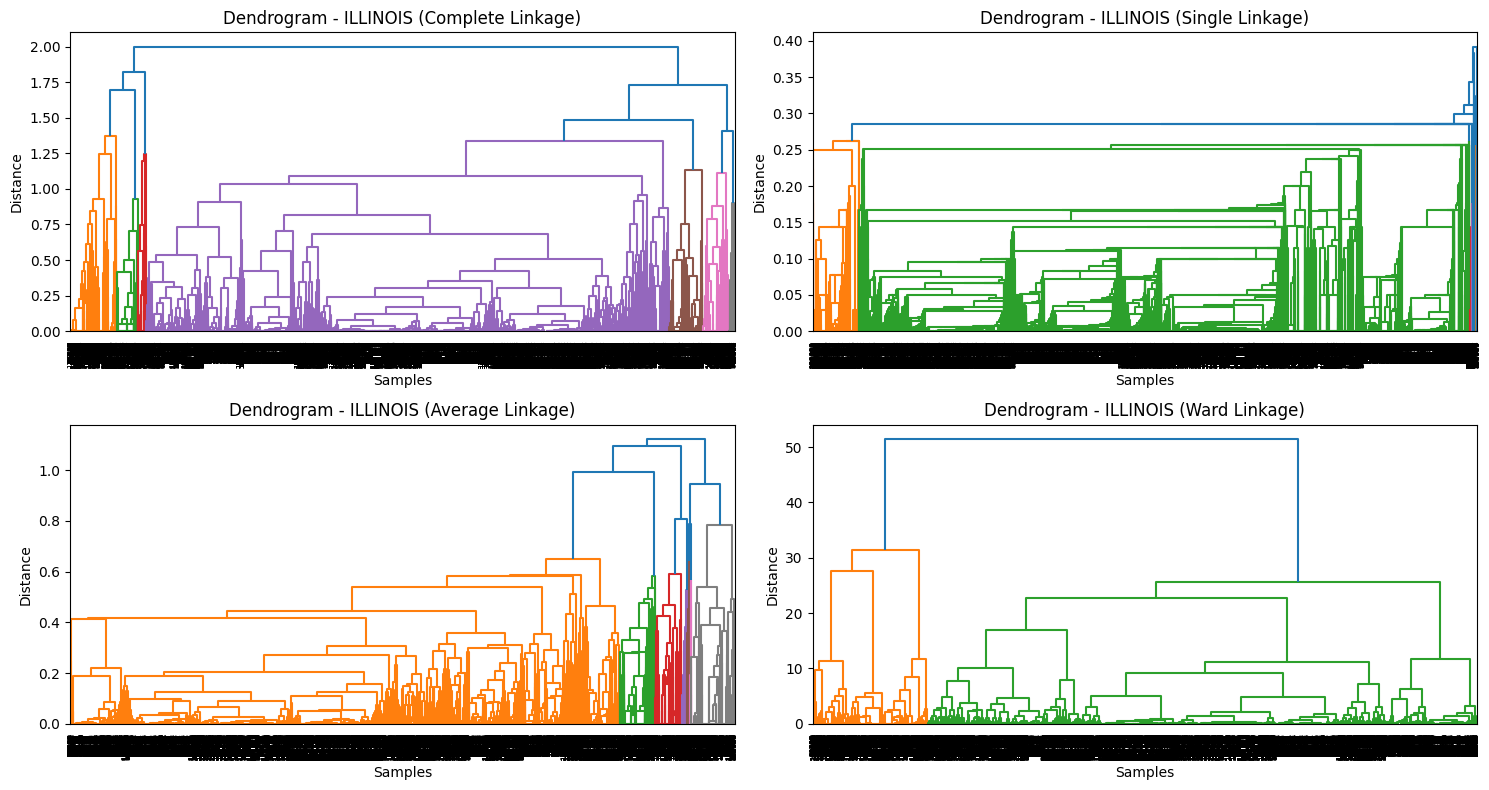

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import MinMaxScaler


selected_state = 'ILLINOIS'
state_data = dfinal[dfinal['state'] == selected_state][['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']]


scaler = MinMaxScaler()
state_data_normalized = scaler.fit_transform(state_data)

# cycle for each kind of
methods = ['complete', 'single', 'average', 'ward']
plt.figure(figsize=(15, 8))

for i, method in enumerate(methods, 1):
    plt.subplot(2, 2, i)

    linkage_matrix = linkage(state_data_normalized, method=method)

    dendrogram(linkage_matrix, labels=state_data.index, orientation='top', distance_sort='descending', show_leaf_counts=True)

    plt.title(f'Dendrogram - {selected_state} ({method.capitalize()} Linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()


To conduct an analysis based on the state of Illinois using different hierarchical clustering techniques with various linking methods, we can examine the dendrograms generated and the differences in the results. Below is a general analysis.
for the best cut without repeating the elbow method to know which is the best cut, as before we can take 4 into consideration

Datasets and Features:

We selected the state of Illinois from the dfinal dataset.
The features taken into account are: 'killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', and 'povertyPercentage'.
Connection Methods:

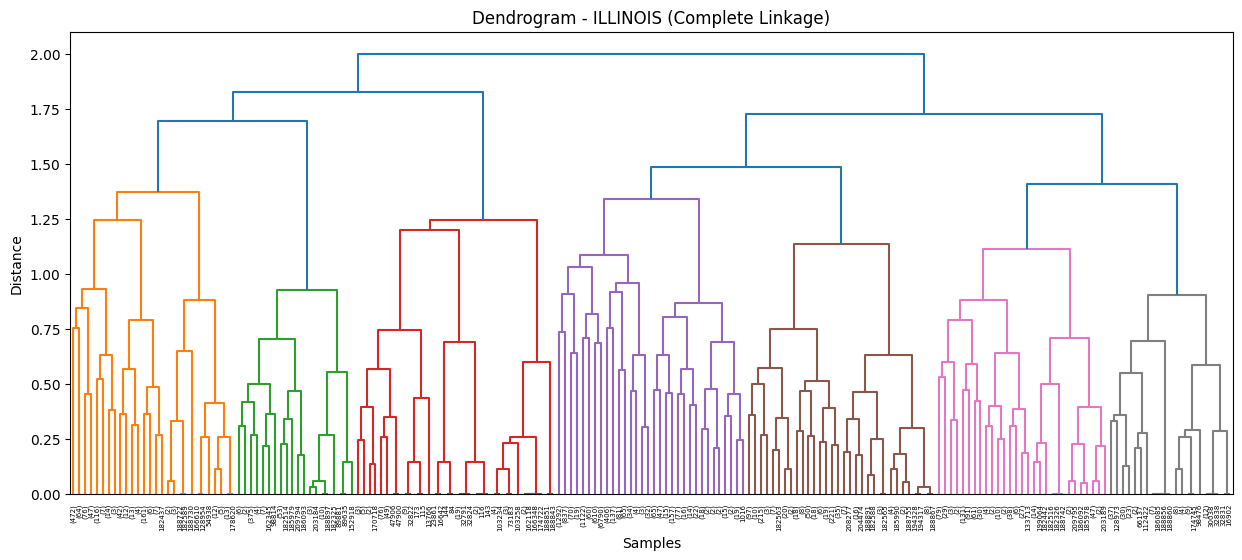

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler


selected_state = 'ILLINOIS'
state_data = dfinal[dfinal['state'] == selected_state][['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']]

scaler = MinMaxScaler()
state_data_normalized = scaler.fit_transform(state_data)


linkage_matrix = linkage(state_data_normalized, method='complete')


plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, labels=state_data.index,  distance_sort='descending', show_leaf_counts=True, truncate_mode='level', p=7)

plt.title(f'Dendrogram - {selected_state} (Complete Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


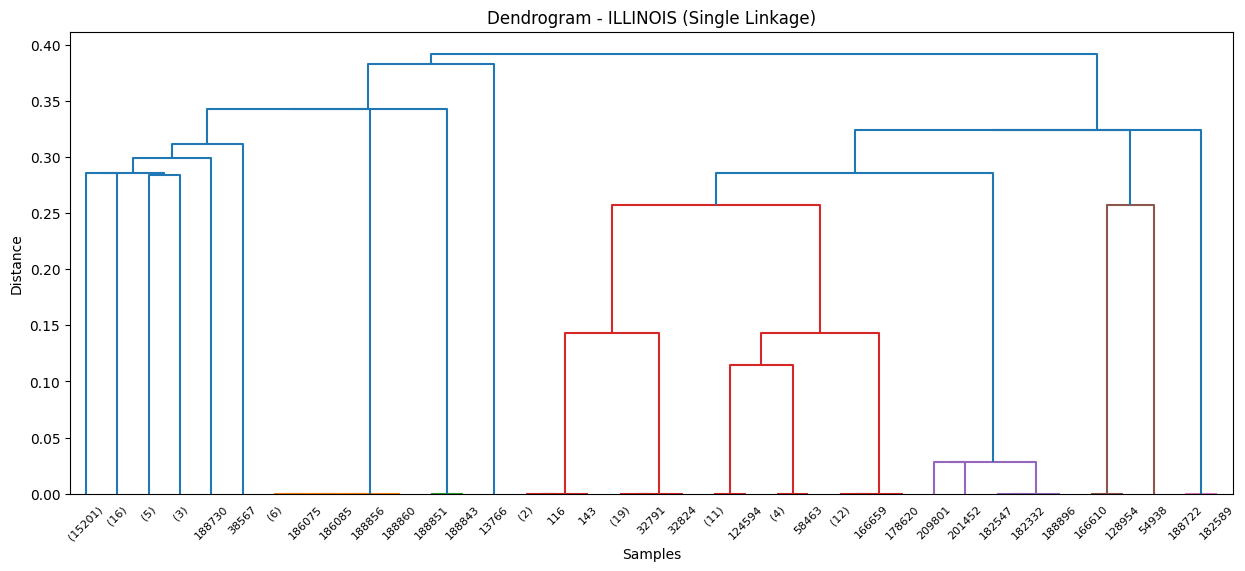

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler


selected_state = 'ILLINOIS'
state_data = dfinal[dfinal['state'] == selected_state][['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']]


scaler = MinMaxScaler()
state_data_normalized = scaler.fit_transform(state_data)

#Complete Linkage
linkage_matrix = linkage(state_data_normalized, method='single')

plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, labels=state_data.index,  distance_sort='descending', show_leaf_counts=True, truncate_mode='level', p=7)

plt.title(f'Dendrogram - {selected_state} (Single Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


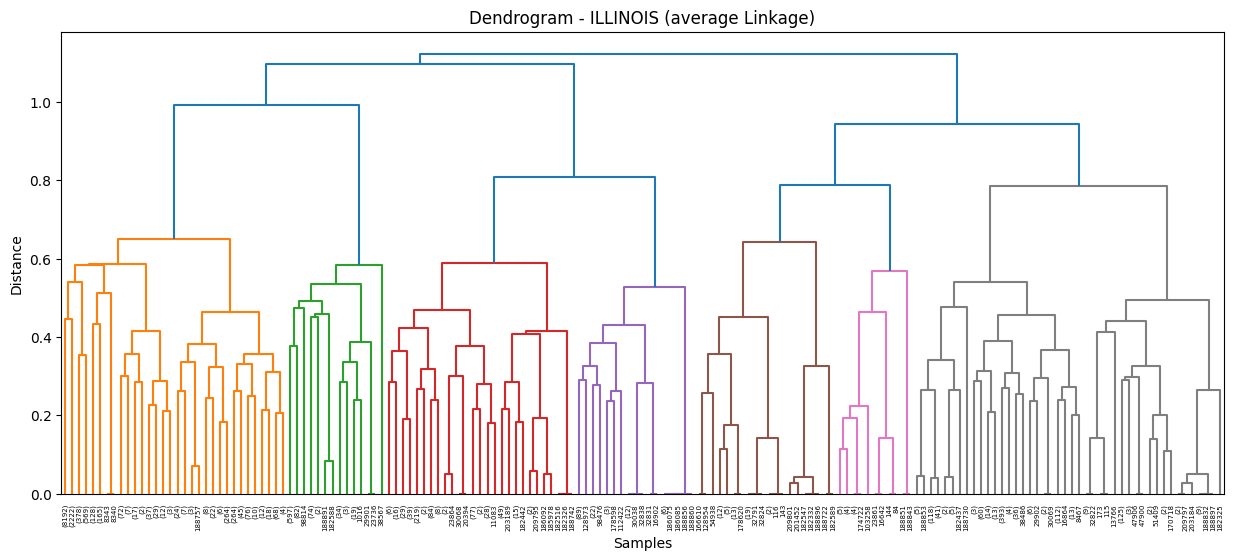

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler


selected_state = 'ILLINOIS'
state_data = dfinal[dfinal['state'] == selected_state][['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']]


scaler = MinMaxScaler()
state_data_normalized = scaler.fit_transform(state_data)

linkage_matrix = linkage(state_data_normalized, method='average')

plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, labels=state_data.index,  distance_sort='descending', show_leaf_counts=True, truncate_mode='level', p=7)

plt.title(f'Dendrogram - {selected_state} (average Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


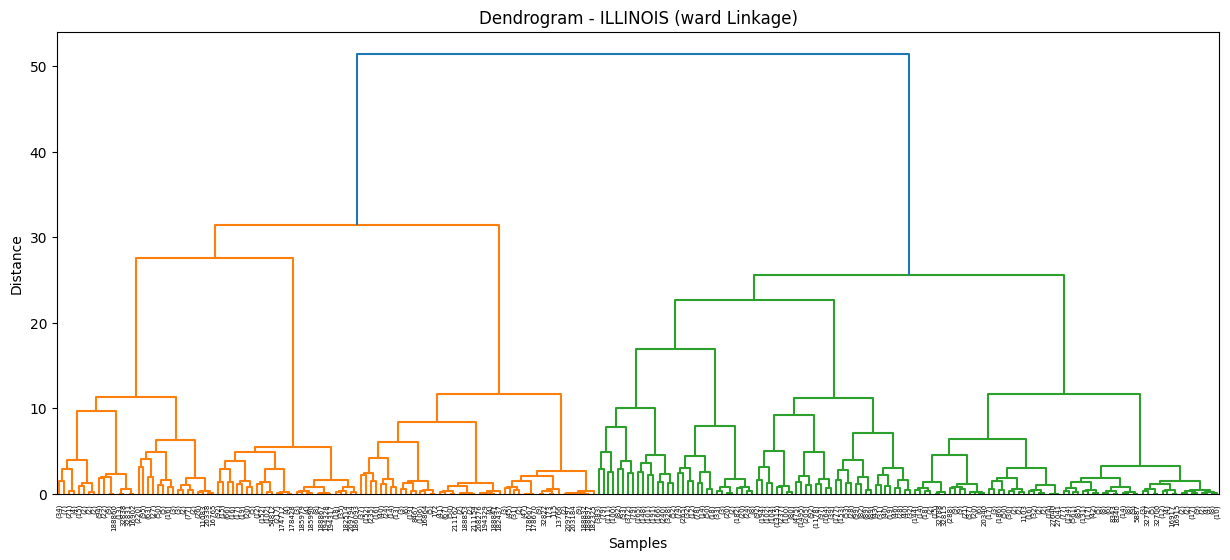

In [ ]:

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler


selected_state = 'ILLINOIS'
state_data = dfinal[dfinal['state'] == selected_state][['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']]


scaler = MinMaxScaler()
state_data_normalized = scaler.fit_transform(state_data)

linkage_matrix = linkage(state_data_normalized, method='ward')

plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, labels=state_data.index,  distance_sort='descending', show_leaf_counts=True, truncate_mode='level', p=7)

plt.title(f'Dendrogram - {selected_state} (ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


#analisis and differences of kmeasn and hierarchical
for istance if we have taken 1000 observations and the dendogram is extremely hard to be examinated and also extremely computationally expensive
the more observation we take the slower will gets
WHILE kmeans doesn't have this kind of issue.

# Try all the methods using manhattan distance

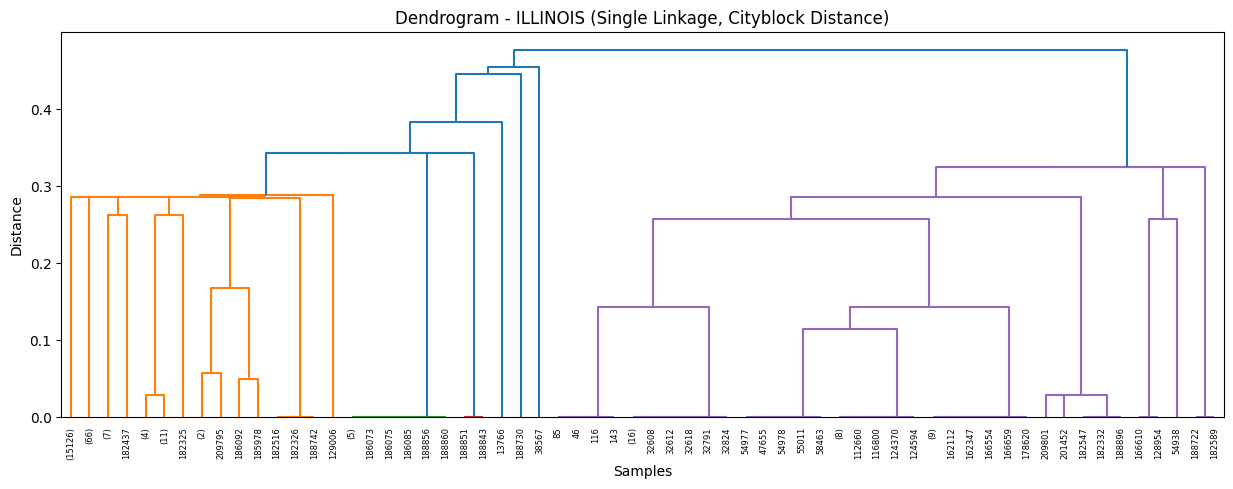

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import MinMaxScaler


selected_state = 'ILLINOIS'
state_data = dfinal[dfinal['state'] == selected_state][['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']]

scaler = MinMaxScaler()
state_data_normalized = scaler.fit_transform(state_data)

linkage_method = 'single'
distance_metric = 'cityblock'  # Distanza di Manhattan

linkage_matrix = linkage(state_data_normalized, method=linkage_method, metric=distance_metric)

plt.figure(figsize=(15, 5))
dendrogram(linkage_matrix, labels=state_data.index, orientation='top', distance_sort='descending', show_leaf_counts=True, truncate_mode='level', p=10)

plt.title(f'Dendrogram - {selected_state} ({linkage_method.capitalize()} Linkage, {distance_metric.capitalize()} Distance)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


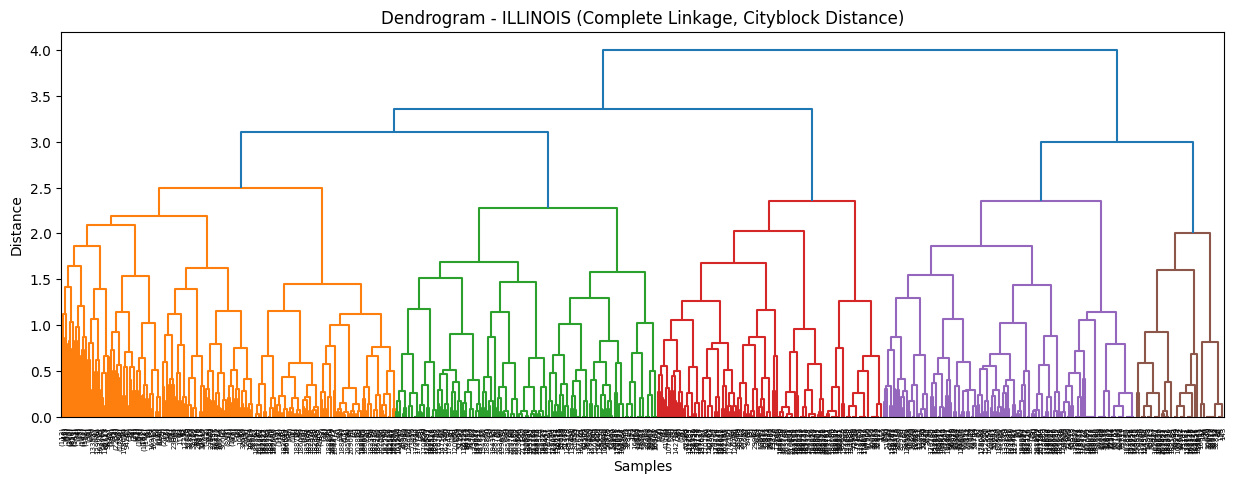

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import MinMaxScaler


selected_state = 'ILLINOIS'
state_data = dfinal[dfinal['state'] == selected_state][['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']]


scaler = MinMaxScaler()
state_data_normalized = scaler.fit_transform(state_data)


linkage_method = 'complete'
distance_metric = 'cityblock'  # Distanza di Manhattan


linkage_matrix = linkage(state_data_normalized, method=linkage_method, metric=distance_metric)


plt.figure(figsize=(15, 5))
dendrogram(linkage_matrix, labels=state_data.index, orientation='top', distance_sort='descending', show_leaf_counts=True, truncate_mode='level', p=10)

plt.title(f'Dendrogram - {selected_state} ({linkage_method.capitalize()} Linkage, {distance_metric.capitalize()} Distance)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


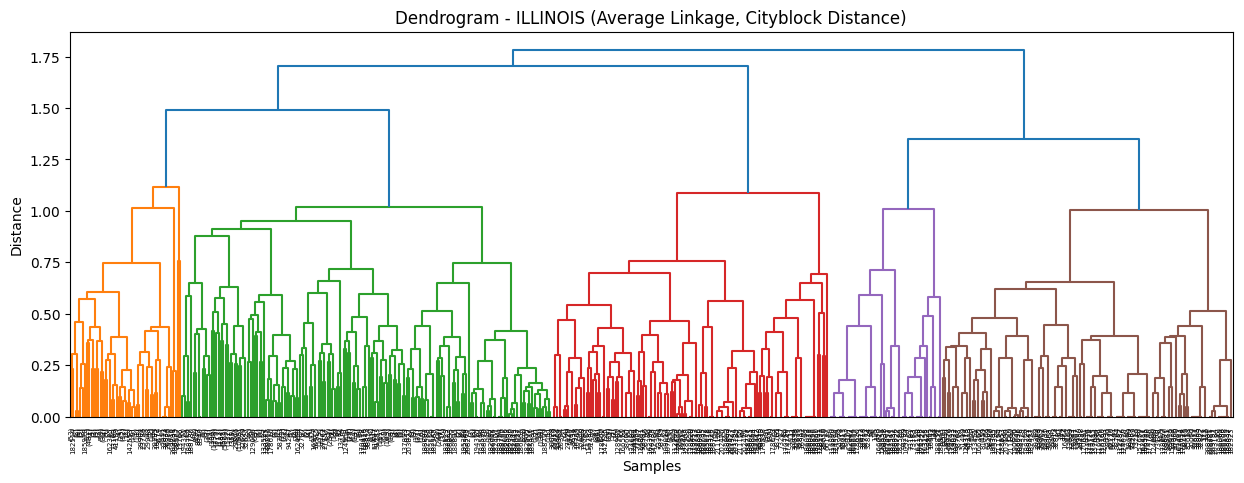

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import MinMaxScaler


selected_state = 'ILLINOIS'
state_data = dfinal[dfinal['state'] == selected_state][['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']]


scaler = MinMaxScaler()
state_data_normalized = scaler.fit_transform(state_data)


linkage_method = 'average'
distance_metric = 'cityblock'  # Distanza di Manhattan

linkage_matrix = linkage(state_data_normalized, method=linkage_method, metric=distance_metric)


plt.figure(figsize=(15, 5))
dendrogram(linkage_matrix, labels=state_data.index, orientation='top', distance_sort='descending', show_leaf_counts=True, truncate_mode='level', p=10)

plt.title(f'Dendrogram - {selected_state} ({linkage_method.capitalize()} Linkage, {distance_metric.capitalize()} Distance)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


ward cannot be done with the manhattan distance

Fit clusterings with params found by exploring dendrograms

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Seleziona uno stato dal tuo dataset, ad esempio l'Illinois
selected_state = 'ILLINOIS'
state_data = dfinal[dfinal['state'] == selected_state][['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']]

# Normalizza i dati numerici
scaler = MinMaxScaler()
state_data_normalized = scaler.fit_transform(state_data)

# Prepara i dendrogrammi e calcola i coefficienti di silhouette per i diversi metodi di collegamento
methods = ['complete', 'single', 'average', 'ward']
silhouette_scores = {}

for method in methods:
    # Crea un oggetto di clustering gerarchico con il metodo di collegamento corrente
    clustering = AgglomerativeClustering(n_clusters=4, linkage=method)
    labels = clustering.fit_predict(state_data_normalized)

    # Calcola il coefficiente di silhouette per valutare il clustering
    silhouette = silhouette_score(state_data_normalized, labels)
    silhouette_scores[method] = silhouette

# Stampa i coefficienti di silhouette per confronto
for method, silhouette in silhouette_scores.items():
    print(f"Silhouette Score ({method.capitalize()} Linkage): {silhouette}")


Silhouette Score (Complete Linkage): 0.5103150443983763
Silhouette Score (Single Linkage): 0.43752643410505776
Silhouette Score (Average Linkage): 0.5599117776986932
Silhouette Score (Ward Linkage): 0.559680270658843


The results show that, based on the silhouette coefficient, the “Average” and “Ward” linkage methods appear to produce the best clusterings for the state of Illinois data among those you considered.

#Explore the opportunity to use alternative clustering
techniques in the library: https://github.com/annoviko/pyclustering/


In [12]:
 !pip install pyclustering

In [ ]:
df_cluster.head(19)

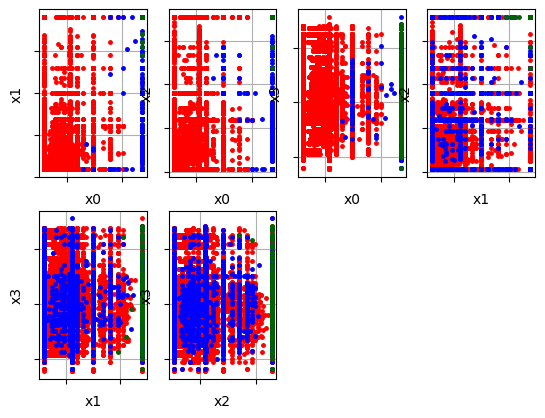

In [ ]:
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.cure import cure
from sklearn.preprocessing import StandardScaler

# Rimuovi i duplicati da df_cluster
df_cluster_unique = df_cluster.drop_duplicates()

# Seleziona le feature per il clustering
selected_features = ['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']
df_cluster_selected = df_cluster_unique[selected_features]

# Normalizza le feature
scaler = StandardScaler()
df_cluster_normalized = scaler.fit_transform(df_cluster_selected)

# Configura l'algoritmo CURE
cure_instance = cure(df_cluster_normalized.tolist(), 3)  # Specifica il numero desiderato di cluster

# Esegui l'algoritmo CURE
cure_instance.process()

# Ottieni i risultati dei cluster
clusters = cure_instance.get_clusters()

# Visualizza i risultati
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, df_cluster_normalized.tolist())
visualizer.show()


#X-means

The X-Means algorithm is a variant of the K-Means algorithm that attempts to solve the problem of choosing the optimal number of clusters automatically. X-Means starts with an initial cluster number and, after running K-Means on each cluster, uses some evaluation criteria (such as log-likelihood) to decide whether or not to divide each cluster into smaller sub-clusters. These new method of X-means can help to have better improvements insted of using the K-Means

KeyboardInterrupt: 

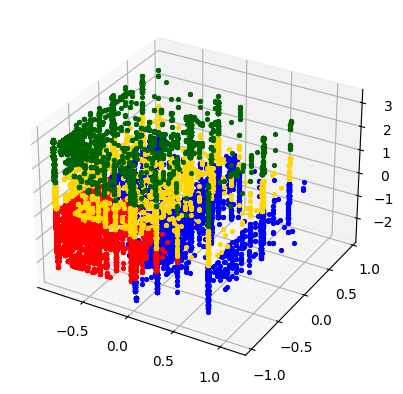

In [16]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.utils import read_sample
from sklearn.preprocessing import StandardScaler

# Seleziona le feature per il clustering
selected_features = ['killed_participation_rate', 'arrested_participation_rate', 'povertyPercentage']
df_cluster_selected = dfinal_int[selected_features]

# Normalizza le feature
scaler = StandardScaler()
df_cluster_normalized = scaler.fit_transform(df_cluster_selected)

# Configura l'algoritmo X-Means
initial_centers = [[0.0 for _ in range(df_cluster_normalized.shape[1])]]
xmeans_instance = xmeans(df_cluster_normalized.tolist(), initial_centers)

# Esegui X-Means
xmeans_instance.process()

# Ottieni i risultati dei cluster
clusters = xmeans_instance.get_clusters()

# Visualizza i risultati
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, df_cluster_normalized.tolist())
visualizer.show()

# Visualizza i risultati dei cluster con i centri
centers = xmeans_instance.get_centers()
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, df_cluster_normalized.tolist())
visualizer.append_cluster(centers, None, marker='*', markersize=10)
visualizer.show()


Given that  Only objects with size dimension 1 (1D plot), 2 (2D plot) or 3 (3D plot)  and i our case we have more than 3 Features. Those can be displayed. For multi-dimensional data we will  use 'cluster_visualizer_multidim'.

#Cure done with large visualization

In [17]:
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.cure import cure
from sklearn.preprocessing import StandardScaler

# Rimuovi i duplicati da df_cluster
df_cluster_unique = df_cluster.drop_duplicates()

# Seleziona le feature per il clustering
selected_features = ['killed_participation_rate', 'injuredd_participation_rate', 'arrested_participation_rate', 'povertyPercentage']
df_cluster_selected = df_cluster_unique[selected_features]

# Normalizza le feature
scaler = StandardScaler()
df_cluster_normalized = scaler.fit_transform(df_cluster_selected)

# Configura l'algoritmo CURE
cure_instance = cure(df_cluster_normalized.tolist(), 3)  # Specifica il numero desiderato di cluster

# Esegui l'algoritmo CURE
cure_instance.process()

# Ottieni i risultati dei cluster
clusters = cure_instance.get_clusters()

# Visualizza i risultati
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, df_cluster_normalized.tolist())

# Imposta le etichette degli assi (opzionale, cambia in base alle tue feature)
visualizer.set_x_label('Feature 1')
visualizer.set_y_label('Feature 2')
visualizer.set_z_label('Feature 3')

# Mostra la visualizzazione
visualizer.show()


AttributeError: 'cluster_visualizer_multidim' object has no attribute 'set_x_label'